# 1) ML Project - Air Pollution - Data Exploration - Viz - Linear Regression

<font color='blue'> Scripts by Kevin Jeswani, Junaid Zafar, & Laiba Shah 
<br>
WeCloudData Bootcamp 2022 (Part-time Cohort)<br> </font>

First we take a look at a dataset for air pollutions deaths due over time for different countries. We visualize data and develop the linear regression models on the regional and national level. The linear regression models are valuable at predicting the general trend in deaths due over time and be used to predict future deaths, where past data appears to be highly linear. It has severe limitations for many countries. Polynomial models could be explored. To explore the interaction with other features, we proceed to merge different datasets between death due to environmental factors and socio-demographic/economic factors. We then examine them in 3 tree-based machine learning models.

The set of scripts in the folder 'AirPollution_Scripts' are segmented for the purpose of clarity & convenience <br>
The following is the suggested order for running the scripts:
- 'MLProject_AirPollution_Viz_LR.ipynb' **This Script** - loading the initial Kaggle air pollution deaths dataset, processing, visualizing the base dataset, linear regression examination and future predictions.
- 'MLProject_DataProcessing_OECD_WB_GBD.ipynb' - loading raw data from world bank and GBD/OECD datasets, cleaning, and merging usable data. We test the use of fuzzy data set merging.
- 'MLProject_Exploratory_ML_Models.ipynb' - loading the cleaning & merged dataset, testing out KNN regressor, and model selection with PyCaret, and discussion of models/insights in modelling data.
- 'MLProject_ML_Models_refined.ipynb' - development of selected machine learning models (Extra Trees, Random Forest, XGBoost), cross-validation, & Ensemble methods; discussion of model results

The aim is to explore the intial dataset (https://www.kaggle.com/datasets/akshat0giri/death-due-to-air-pollution-19902017?resource=download), supplement it, infer trends, and make predictions on future deaths due to environmental factors. 
The data is then supplement with:
- Global Burden of Disease Study 2019 Results via OECD.stats: https://stats.oecd.org/index.aspx?lang=en# (where the Kaggle dataset seems to have extracted and cleaned data from)
- World Bank Development Indicators: https://databank.worldbank.org/source/world-development-indicators#
<br>

# 1.0 Importing Essential Libraries <a class="anchor" id="1.0_Libraries"></a>

In [285]:
#Data Processing
import pandas as pd
import numpy as np


#Plotting
import matplotlib as mpl #Matplot lib
import matplotlib.pyplot as plt #pyplot
from matplotlib.lines import Line2D
import plotly.express as px #plotly express
import plotly.io as pio
import kaleido #sub-library required for saving plotly
import seaborn as sns #seabprm
sns.set() 

In [25]:
# Insert your local root folder links here
root = r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts'
root_raw=r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts\Raw Data'
root_proc=r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts\Processed'
root_plots=r'C:\Users\kevin\Documents\WCD_Bootcamp\ML\ML_Project\Scripts\Plots'
# Kaggle dataset - deaths due to air pollution 1990-2017
fid='\death-rates-from-air-pollution.csv'

## 2.0 Exploratory Data Analysis <a class="anchor" id="2.0_EDA"></a>

### 2.1 Load Data & Examine Contents <a class="anchor" id="2.1_LoadContents"></a>

In [3]:
df = pd.read_csv(root_raw+fid) #load the data to pandas
df #display first 5 and last 5

Entity Code  Year  Air pollution (total) (deaths per 100,000)  \
0     Afghanistan  AFG  1990                                  299.477309   
1     Afghanistan  AFG  1991                                  291.277967   
2     Afghanistan  AFG  1992                                  278.963056   
3     Afghanistan  AFG  1993                                  278.790815   
4     Afghanistan  AFG  1994                                  287.162923   
...           ...  ...   ...                                         ...   
6463     Zimbabwe  ZWE  2013                                  143.850145   
6464     Zimbabwe  ZWE  2014                                  138.200536   
6465     Zimbabwe  ZWE  2015                                  132.752553   
6466     Zimbabwe  ZWE  2016                                  128.692138   
6467     Zimbabwe  ZWE  2017                                  125.028843   

      Indoor air pollution (deaths per 100,000)  \
0                                    250.362910   
1                                    242.575125   
2                                    232.043878   
3                                    231.648134   
4                                    238.837177   
...                                         ...   
6463                                 113.456097   
6464                                 108.703566   
6465                                 104.340506   
6466                                 100.392287   
6467                                  96.235996   

      Outdoor particulate matter (deaths per 100,000)  \
0                                           46.446589   
1                                           46.033841   
2                                           44.243766   
3                                           44.440148   
4                                           45.594328   
...                                               ...   
6463                                        27.589603   
6464                                        26.760618   
6465                                        25.715415   
6466                                        25.643570   
6467                                        26.166182   

      Outdoor ozone pollution (deaths per 100,000)  
0                                         5.616442  
1                                         5.603960  
2                                         5.611822  
3                                         5.655266  
4                                         5.718922  
...                                            ...  
6463                                      4.426291  
6464                                      4.296971  
6465                                      4.200907  
6466                                      4.117173  
6467                                      4.052495  

[6468 rows x 7 columns]

In [4]:
#statistics of 3 dependent variables (deaths + 1 summation) & 1 independent variable (year)
df.describe()

Year  Air pollution (total) (deaths per 100,000)  \
count  6468.000000                                 6468.000000   
mean   2003.500000                                   87.804083   
std       8.078372                                   57.845436   
min    1990.000000                                    8.401696   
25%    1996.750000                                   41.016114   
50%    2003.500000                                   72.653557   
75%    2010.250000                                  127.607177   
max    2017.000000                                  318.463253   

       Indoor air pollution (deaths per 100,000)  \
count                                6468.000000   
mean                                   50.481504   
std                                    58.722565   
min                                     0.003859   
25%                                     2.002779   
50%                                    23.737851   
75%                                    90.138777   
max                                   293.509187   

       Outdoor particulate matter (deaths per 100,000)  \
count                                      6468.000000   
mean                                         35.114982   
std                                          18.207369   
min                                           7.542899   
25%                                          21.955108   
50%                                          30.977196   
75%                                          44.604181   
max                                         132.815726   

       Outdoor ozone pollution (deaths per 100,000)  
count                                   6468.000000  
mean                                       3.370793  
std                                        4.325445  
min                                        0.000000  
25%                                        1.302905  
50%                                        2.338684  
75%                                        3.515409  
max                                       37.356034

In [5]:
#Check for null values in the dataset
df.isnull().sum()

Entity                                               0
Code                                               980
Year                                                 0
Air pollution (total) (deaths per 100,000)           0
Indoor air pollution (deaths per 100,000)            0
Outdoor particulate matter (deaths per 100,000)      0
Outdoor ozone pollution (deaths per 100,000)         0
dtype: int64

In [6]:
#Codes are country codes - Entities that are groupings/aggregates of countries do not have a code
df['Code'].nunique()

196

In [7]:
#total number of unique entities
df['Entity'].nunique()

231

In [8]:
#Get the unique entities without Codes
entity_groups=list(df[df['Code'].isnull()]['Entity'].unique())
entity_groups
#= in general Groupings of countries/continents/sub-continents

['Andean Latin America',
 'Australasia',
 'Caribbean',
 'Central Asia',
 'Central Europe',
 'Central Europe, Eastern Europe, and Central Asia',
 'Central Latin America',
 'Central Sub-Saharan Africa',
 'East Asia',
 'Eastern Europe',
 'Eastern Sub-Saharan Africa',
 'England',
 'High SDI',
 'High-income',
 'High-income Asia Pacific',
 'High-middle SDI',
 'Latin America and Caribbean',
 'Low SDI',
 'Low-middle SDI',
 'Middle SDI',
 'North Africa and Middle East',
 'North America',
 'Northern Ireland',
 'Oceania',
 'Scotland',
 'South Asia',
 'Southeast Asia',
 'Southeast Asia, East Asia, and Oceania',
 'Southern Latin America',
 'Southern Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Tropical Latin America',
 'Wales',
 'Western Europe',
 'Western Sub-Saharan Africa']

### 2.2 Data Cleaning <a class="anchor" id="2.2_DataCleaning"></a>

In [9]:
#Check that total death due to pollution equals the summation of the 3 inidividual categories
df['totalsError']=df['Air pollution (total) (deaths per 100,000)']-\
                            df['Indoor air pollution (deaths per 100,000)']-\
                            df['Outdoor particulate matter (deaths per 100,000)']-\
                            df['Outdoor ozone pollution (deaths per 100,000)']
df[df['totalsError']!=0]['totalsError'].describe()

count    6.449000e+03
mean    -1.166623e+00
std      1.877950e+00
min     -1.526814e+01
25%     -1.175276e+00
50%     -5.995065e-01
75%     -2.914178e-01
max      2.842171e-14
Name: totalsError, dtype: float64

In [10]:
df

Entity Code  Year  Air pollution (total) (deaths per 100,000)  \
0     Afghanistan  AFG  1990                                  299.477309   
1     Afghanistan  AFG  1991                                  291.277967   
2     Afghanistan  AFG  1992                                  278.963056   
3     Afghanistan  AFG  1993                                  278.790815   
4     Afghanistan  AFG  1994                                  287.162923   
...           ...  ...   ...                                         ...   
6463     Zimbabwe  ZWE  2013                                  143.850145   
6464     Zimbabwe  ZWE  2014                                  138.200536   
6465     Zimbabwe  ZWE  2015                                  132.752553   
6466     Zimbabwe  ZWE  2016                                  128.692138   
6467     Zimbabwe  ZWE  2017                                  125.028843   

      Indoor air pollution (deaths per 100,000)  \
0                                    250.362910   
1                                    242.575125   
2                                    232.043878   
3                                    231.648134   
4                                    238.837177   
...                                         ...   
6463                                 113.456097   
6464                                 108.703566   
6465                                 104.340506   
6466                                 100.392287   
6467                                  96.235996   

      Outdoor particulate matter (deaths per 100,000)  \
0                                           46.446589   
1                                           46.033841   
2                                           44.243766   
3                                           44.440148   
4                                           45.594328   
...                                               ...   
6463                                        27.589603   
6464                                        26.760618   
6465                                        25.715415   
6466                                        25.643570   
6467                                        26.166182   

      Outdoor ozone pollution (deaths per 100,000)  totalsError  
0                                         5.616442    -2.948632  
1                                         5.603960    -2.934959  
2                                         5.611822    -2.936410  
3                                         5.655266    -2.952733  
4                                         5.718922    -2.987504  
...                                            ...          ...  
6463                                      4.426291    -1.621846  
6464                                      4.296971    -1.560618  
6465                                      4.200907    -1.504274  
6466                                      4.117173    -1.460892  
6467                                      4.052495    -1.425831  

[6468 rows x 8 columns]

6499 entries have a mean error of 1.166 deaths per 100k <br> 
This may be an error or may be a fourth category that does not fall under the the Indoor/OutdoorPM2.5,
or ozone pollution <br>
**We will ignore this for now** <br>

In [11]:
#Dropping the Code column - not useful since we already used it to determine aggregate entities
df.drop('Code', axis=1, inplace=True)

In [12]:
#Making sure that all years meet the same number of times equal to the number of countries
len(df['Entity'].unique())

231

In [13]:
for uniqe_year in df['Year'].unique():
    print((df[df['Year']==uniqe_year].count()), uniqe_year)

Entity                                             231
Year                                               231
Air pollution (total) (deaths per 100,000)         231
Indoor air pollution (deaths per 100,000)          231
Outdoor particulate matter (deaths per 100,000)    231
Outdoor ozone pollution (deaths per 100,000)       231
totalsError                                        231
dtype: int64 1990
Entity                                             231
Year                                               231
Air pollution (total) (deaths per 100,000)         231
Indoor air pollution (deaths per 100,000)          231
Outdoor particulate matter (deaths per 100,000)    231
Outdoor ozone pollution (deaths per 100,000)       231
totalsError                                        231
dtype: int64 1991
Entity                                             231
Year                                               231
Air pollution (total) (deaths per 100,000)         231
Indoor air pollution (deaths 

In [14]:
#Drop Contituents of the UK - Other datasets that we may want to integrate only have United Kingdom
df.drop(df[(df['Entity']=='England') |
           (df['Entity']=='Northern Ireland') |
          (df['Entity']=='Wales') |
          (df['Entity']=='Scotland')].index,inplace=True)

In [15]:
#Separate out countries, regions, & economic/sustainability aggregates
regions =['Andean Latin America','Australasia', 'Caribbean', 'Central Asia', 'Central Europe',
          'Central Europe, Eastern Europe, and Central Asia', 'Central Latin America', 'Central Sub-Saharan Africa',
          'East Asia', 'Eastern Europe', 'Eastern Sub-Saharan Africa','Latin America and Caribbean',
          'North Africa and Middle East','North America','Oceania', 'South Asia','Southeast Asia',
          'Southeast Asia, East Asia, and Oceania','Southern Latin America','Southern Sub-Saharan Africa',
          'Sub-Saharan Africa','Tropical Latin America','Western Europe','Western Sub-Saharan Africa','World']
#Repeat with SDI (Socio-demographic index categorization) & income
SDIs=['High SDI','High-middle SDI', 'Middle SDI','Low-middle SDI','Low SDI']
income=['High-income','High-income Asia Pacific']

In [16]:
#Data frame of countries only
df_countries=df

In [17]:
#Regional Analysis
df_regions=df_countries[df_countries['Entity'].isin(regions)]
#Repeat with SDIs and Income
df_SDIs=df_countries[df_countries['Entity'].isin(SDIs)]
df_income=df_countries[df_countries['Entity'].isin(income)]

In [18]:
#Remove the region, SDIs, and income groupings from the base df_countries
df_countries.drop(df_countries[df_countries['Entity'].isin(regions+income+SDIs)].index,inplace=True)
df_countries

Entity  Year  Air pollution (total) (deaths per 100,000)  \
0     Afghanistan  1990                                  299.477309   
1     Afghanistan  1991                                  291.277967   
2     Afghanistan  1992                                  278.963056   
3     Afghanistan  1993                                  278.790815   
4     Afghanistan  1994                                  287.162923   
...           ...   ...                                         ...   
6463     Zimbabwe  2013                                  143.850145   
6464     Zimbabwe  2014                                  138.200536   
6465     Zimbabwe  2015                                  132.752553   
6466     Zimbabwe  2016                                  128.692138   
6467     Zimbabwe  2017                                  125.028843   

      Indoor air pollution (deaths per 100,000)  \
0                                    250.362910   
1                                    242.575125   
2                                    232.043878   
3                                    231.648134   
4                                    238.837177   
...                                         ...   
6463                                 113.456097   
6464                                 108.703566   
6465                                 104.340506   
6466                                 100.392287   
6467                                  96.235996   

      Outdoor particulate matter (deaths per 100,000)  \
0                                           46.446589   
1                                           46.033841   
2                                           44.243766   
3                                           44.440148   
4                                           45.594328   
...                                               ...   
6463                                        27.589603   
6464                                        26.760618   
6465                                        25.715415   
6466                                        25.643570   
6467                                        26.166182   

      Outdoor ozone pollution (deaths per 100,000)  totalsError  
0                                         5.616442    -2.948632  
1                                         5.603960    -2.934959  
2                                         5.611822    -2.936410  
3                                         5.655266    -2.952733  
4                                         5.718922    -2.987504  
...                                            ...          ...  
6463                                      4.426291    -1.621846  
6464                                      4.296971    -1.560618  
6465                                      4.200907    -1.504274  
6466                                      4.117173    -1.460892  
6467                                      4.052495    -1.425831  

[5460 rows x 7 columns]

In [19]:
#Save cleaned set to csv by grouping
fid='\AirPollutionDeaths_Countries.csv' #Countries
df_countries.to_csv(root_proc+fid)
fid='AirPollutionDeaths_Regions.csv' #Regions
df_regions.to_csv(root_proc+fid)
fid='AirPollutionDeaths_SDI.csv' #SDI (Socio-demographic index)
df_SDIs.to_csv(root_proc+fid)
fid='AirPollutionDeaths_income.csv' #Income
df_income.to_csv(root_proc+fid)

## 3.0 Data visualization <a class="anchor" id="3.0_DataViz"></a>

### 3.1 Correlation Heat Map - Countries & Aggregates <a class="anchor" id="3.1_CorelationHeatmap"></a>

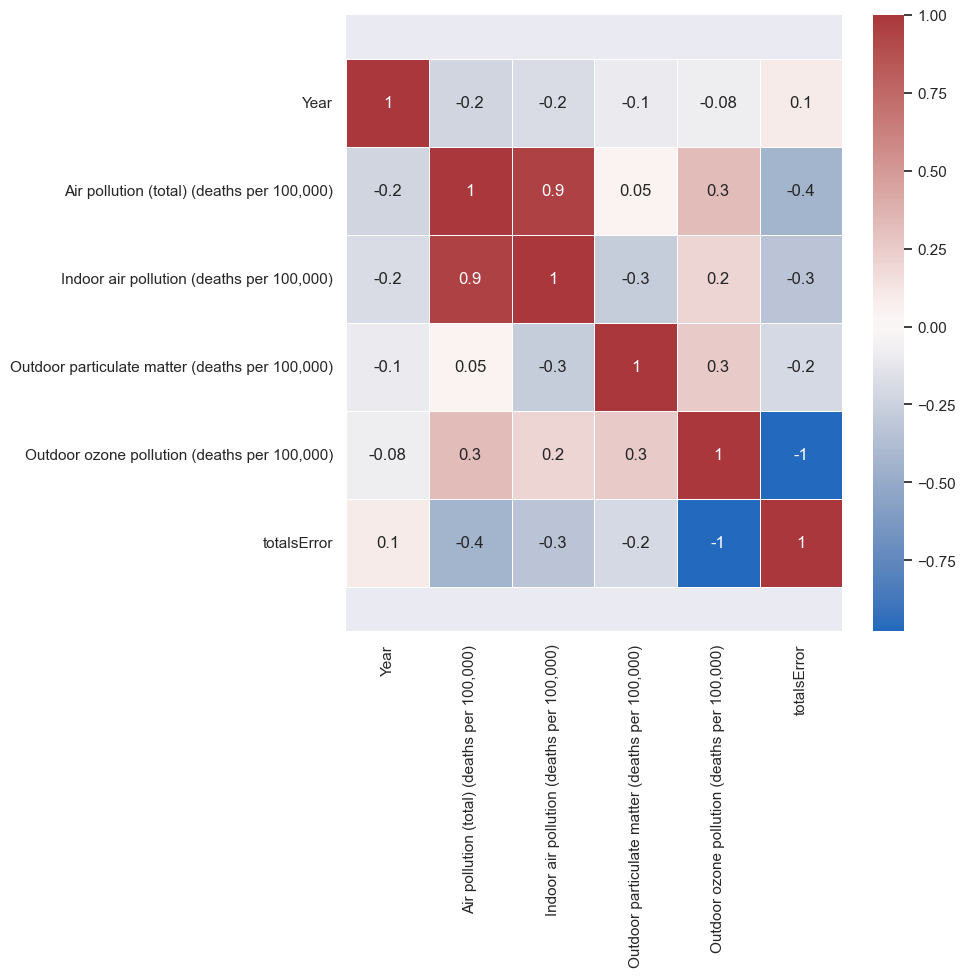

In [26]:
#plot correlation heatmap, store containers fig and ax
fig, ax = plt.subplots(figsize = (8,8))
#Heatmap with seaborn
sns.heatmap(df.corr(), fmt='.1g', annot = True, ax=ax,linewidths=.5,cmap="vlag")
#get and reset the limits
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Save fig
fid='\AirPollutionDeaths_Kaggle_CorrelationHeatmap.png'
plt.savefig(root_plots+fid, format='png', dpi=600,bbox_inches='tight')

Correlation between deaths and Indoor populaion is 0.9 which indicates that most deaths are due to indoor pollution

### 3.2 Lineplot (Trend) - Countries & Aggregates - Central Tendency & 95% Confidence Interval <a class="anchor" id="3.2_LinePlot_all"></a>

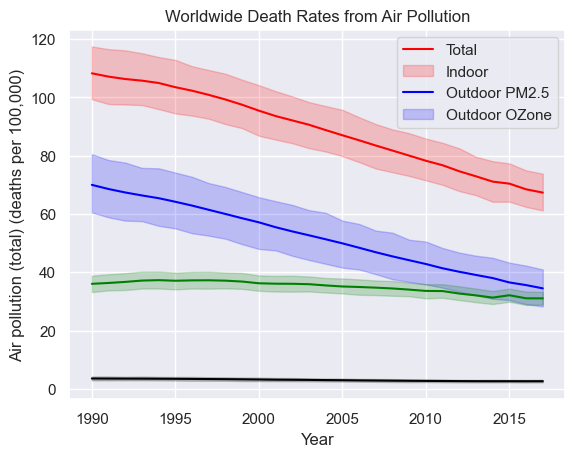

<Figure size 640x480 with 0 Axes>

In [318]:
#Seaborn to plot 3 deaths types + total deaths for each country, taking central tendency & 95% CI of all countries 
fig = sns.lineplot(x="Year", y="Air pollution (total) (deaths per 100,000)", data=df,color = 'red')
fig = sns.lineplot(x="Year", y="Indoor air pollution (deaths per 100,000)", data=df, color='blue')
fig = sns.lineplot(x="Year", y="Outdoor particulate matter (deaths per 100,000)", data=df,color='green')
fig = sns.lineplot(x="Year", y="Outdoor ozone pollution (deaths per 100,000)", data=df,color='black')
#Set the title & legend
plt.title("Worldwide Death Rates from Air Pollution")
plt.legend(labels=['Total','Indoor',
                  'Outdoor PM2.5',
                  'Outdoor OZone'],loc='upper right')
plt.show()
#Save plot
fid = "Air Pollution Mortality - Lineplot - Countries & Aggregate.png"
plt.savefig(root_plots+fid, format='png', dpi=600,bbox_inches='tight')

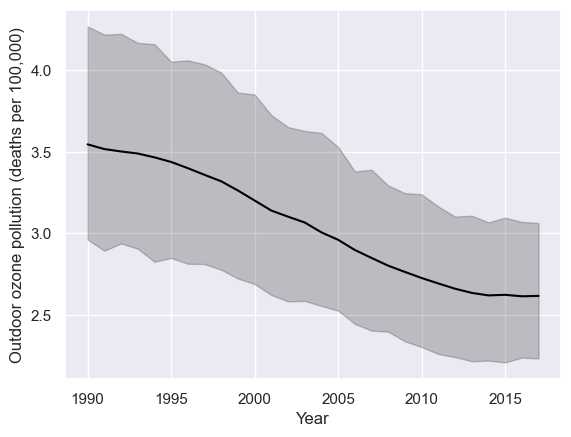

In [319]:
#Taking a closer look at Global OZone Deaths - lineplot with seaborn
fig = sns.lineplot(x="Year", y="Outdoor ozone pollution (deaths per 100,000)", data=df,color='black')

Overall deaths due to air pollution is decreaing (Both Outdoors and Indoors) <br>
Visual inspection - Indoor pollution (due to combustion of solid fuels) has the most impact on total mortality due to air pollution, contributing roughly between 0.6 and 0.5 of total deaths<br>
Additionally outdoor particulate matter (PM2.5) air pollution and ozone appear to be fairly stagnant and both series have fairly low variability <br>
Outdoor particulate matter (PM2.5) mortality seems to contribute roughly between 0.3 to 0.5 of total deaths <br>
**NOTE** The line plots above with the central tendency and 95% confidence intervals can be misleading, there is actually much more scatter in the data as explain in the following sections

### 3.3 Geo-HeatMap (Choropleth) - Countries - 1990 vs. 2017 <a class="anchor" id="3.3_GeoHeatMap></a>

In [32]:
# visualize the situation in the first and last years
#Isolate total air pollution deaths for each country and plot 1990 and 2017 values
df_1990 = df_countries[df_countries['Year']==1990]
df_1990 = df_1990.reset_index() #reset the index 
df_2017 = df_countries[df_countries['Year']==2017]
df_2017 = df_2017.reset_index()

In [33]:
# Plot choroplet with plotly express - colors representing the value scale
temp_df = pd.DataFrame(df_1990['Air pollution (total) (deaths per 100,000)']) #temp df for processing
# set the choropleth fig
fig = px.choropleth(temp_df, locations=df_1990['Entity'],
                    color=temp_df['Air pollution (total) (deaths per 100,000)'],
                    hover_data=['Air pollution (total) (deaths per 100,000)'],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
# Create continuous color scale, locations of colors set to the country names
# set the actual color value to the values in the temp df
# set the geo locations
fig.update_geos(fitbounds="locations", visible=False)
# Add the titl
fig.update_layout(title_text="Heat Map - Total Air Pollution Deaths in 1990")
# Reset the cholor scheme and title
fig.update_coloraxes(colorbar_title="Mortality (per 100,000)",colorscale="reds")
fig.show()
# Save fig
fid="Heat Map - Total Air Pollution Deaths in 1990.png"
pio.write_image(fig,root_plots+fid)

In [34]:
# Isolate total air pollution deaths for each country and plot 1990 and 2017 values
# Repeated steps for 1990's choroplet plot - see above
temp_df = pd.DataFrame(df_2017['Air pollution (total) (deaths per 100,000)'])
fig = px.choropleth(temp_df, locations=df_2017['Entity'],
                    color=temp_df['Air pollution (total) (deaths per 100,000)'],
                    hover_data=['Air pollution (total) (deaths per 100,000)'],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Heat Map - Total Air Pollution Deaths in 2017")
fig.update_coloraxes(colorbar_title="Mortality (per 100,000)",colorscale="blues")
fig.show()
pio.write_image(fig,"Heat Map - Total Air Pollution Deaths in 2017.png")

In [35]:
# Get the total delta between air pollution deaths in each country
df_dif_1990_and_2017 = pd.DataFrame(df_2017['Air pollution (total) (deaths per 100,000)'] - df_1990['Air pollution (total) (deaths per 100,000)'])
df_dif_1990_and_2017.rename(columns={'Air pollution (total) (deaths per 100,000)' : 'Air pollution (total) (deaths per 100,000)_dif'}, inplace=True)
df_dif_1990_and_2017['Entity'] = df_2017['Entity']

In [36]:
# Visualize the difference in the situation in the first and last years
# Isolate total air pollution deaths for each country and plot 1990 and 2017 values
temp_df = pd.DataFrame(df_dif_1990_and_2017['Air pollution (total) (deaths per 100,000)_dif'])
# Set the color value based on custom vector
color_val=temp_df.copy()
# Rename the column
color_val=color_val.rename({'Air pollution (total) (deaths per 100,000)_dif':'colorVal'},axis=1)
# Skew the countries with increase in air pollution deaths to highlight them
color_val.loc[color_val['colorVal']>0,
              'colorVal'] *=10

In [37]:
# Plot the heatmap with custom color value using divering color scheme so 0 delta in deaths per 100,000 is a neutral color
fig = px.choropleth(temp_df, locations=df_dif_1990_and_2017['Entity'],
                    color=color_val['colorVal'],
                    hover_data=['Air pollution (total) (deaths per 100,000)_dif'],
                    color_continuous_scale=px.colors.diverging.RdYlGn[::-1],locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Heat Map - Difference in Total Air Pollution Deaths in Year 1990 & 2017")
fig.update_coloraxes(colorbar_title="Mortality (per 100,000)")#,colorscale=[(0,"red"),(0.02,"yellow"),(0.95,"green")]
fig.show()
pio.write_image(fig,"Heat Map - Difference in Total Air Pollution Deaths in Year 1990 & 2017.png")

We can see Libray, Lesotho, and Uzekistan had an increase in total deaths due to air pollution (per 100,000) <br>
China, Myanmar, Thailand, Afghanistan, and Angola apear to have made the most progress in decreasing deaths per 100,000 (absolute value)

### 3.4 Bar Plots - Examining Countries with Highest & Lowest All-Time Deaths   <a class="anchor" id="3.4_BarPlots"></a>

In [39]:
#Aggregate the total nmber of deaths due to pollution (per 100,000) between 1990-2017
df_g = df_countries.groupby('Entity', as_index=False).aggregate('sum') 
df_g = df_g.sort_values('Air pollution (total) (deaths per 100,000)') #sort the values

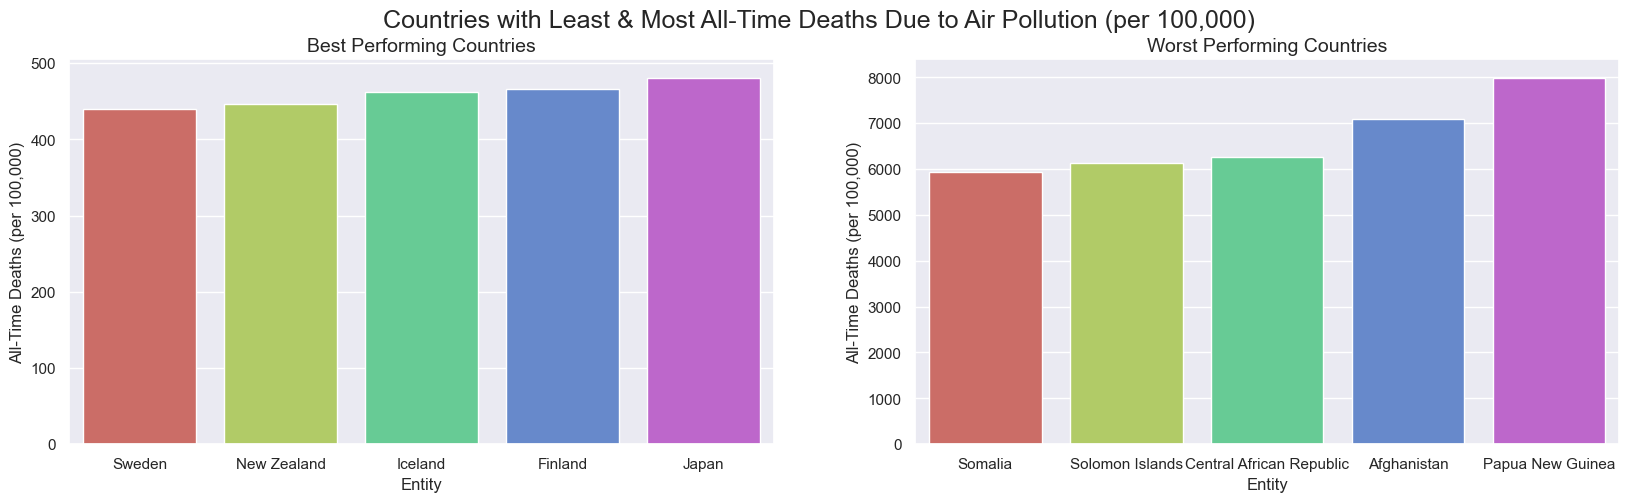

In [40]:
# Generate two bar sub-plots - lowest all-time deaths (per 100,000) due to air pollution vs. hightest
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(20,5))
# setup seaborn barplots
sns.barplot(x='Entity' ,y="Air pollution (total) (deaths per 100,000)", ax=ax1, data=df_g.head(),palette="hls")
sns.barplot(x='Entity', y="Air pollution (total) (deaths per 100,000)", ax=ax2, data=df_g.tail(),palette="hls")
# Set ylabels, title, and figure title
ax1.set_ylabel("All-Time Deaths (per 100,000)")
ax2.set_ylabel("All-Time Deaths (per 100,000)")
ax1.set_title("Best Performing Countries",fontsize=14)
ax2.set_title("Worst Performing Countries",fontsize=14)
fig.suptitle("Countries with Least & Most All-Time Deaths Due to Air Pollution (per 100,000)",fontsize=18)
# Save fig
fid="\Air Pollution Mortality - BarPlot - Best & Worst Performance.png"
fig.savefig(root_plots+fid, format='png', dpi=600,bbox_inches='tight')

In examining the all-time deaths (summation of deaths per 100,000 for all years per entity), we can see that highly developed nations (Sweden, New Zealand, Iceland, Findland, and Japan) perform the best. Not only do these countries have socialized medicine but also stringent air pollution policies. In contrast, war-torn/empoverished countries or small-island nations have deaths about 10x (per 100,000) as large as the best performing countries.

## 4.0 Linear Regression  <a class="anchor" id="4.0_LinearRegression"></a>

To develop a linear regression model for air pollution deaths, we would need to model the 3 sources of air pollution deaths separately then combine them for the total number of death. <br>
We would then check the total number of air pollution deaths, but for this we would need to correct the total deaths as the summation of the 3 air pollution types in the base dataset

### 4.1 Imports & Setup <a class="anchor" id="4.1_Imports"></a>

In [41]:
#Machine Learning-specific - Linear Regression
from sklearn.linear_model import LinearRegression #main model
from sklearn.model_selection import train_test_split #for data spliting
from sklearn.metrics import mean_squared_error, r2_score #for metrics evaluation
import statsmodels.api as sm #stats model required for certain cal

In [42]:
#Correcting the total number of air pollution deaths
df_countries['Corrected Total Deaths (per 100,000)']=df_countries['Air pollution (total) (deaths per 100,000)']-\
                                                    df_countries['totalsError']
df_regions['Corrected Total Deaths (per 100,000)']=df_regions['Air pollution (total) (deaths per 100,000)']-\
                                                    df_regions['totalsError']
df_income['Corrected Total Deaths (per 100,000)']=df_income['Air pollution (total) (deaths per 100,000)']-\
                                                    df_income['totalsError']
df_SDIs['Corrected Total Deaths (per 100,000)']=df_SDIs['Air pollution (total) (deaths per 100,000)']-\
                                                    df_SDIs['totalsError']

C:\Users\kevin\AppData\Local\Temp\ipykernel_34744\542608193.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kevin\AppData\Local\Temp\ipykernel_34744\542608193.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kevin\AppData\Local\Temp\ipykernel_34744\542608193.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

### 4.2 Linear Regression per Region by Air Pollution Type <a class="anchor" id="4.3_RegionalLR"></a>

We will now look at developing individual linear regression models for different regions or economic groups. 

In [402]:
# List of death indicators we are studying
indicators=['Indoor air pollution (deaths per 100,000)','Outdoor particulate matter (deaths per 100,000)',
            'Outdoor ozone pollution (deaths per 100,000)']
# Simplify the list of variables/indicators for processing many models at one
LR_titles=['Indoor_Slopes','Indoor_Intercepts','Indoor_Scores',
                    'OutdoorPM2.5_Slopes','OutdoorPM2.5_Intercepts','OutdoorPM2.5_Scores',
                   'OutdoorOZ_Slopes','OutdoorOZ_Intercepts','OutdoorOZ_Scores']
# Labels for predicted death values columns
Pred_titles=['Entity','Year','Indoor_Actual','Indoor_Predicted','OutdoorPM2.5_Actual','OutdoorPM2.5_Predicted',
             'OutdoorOZ_Actual','OutdoorOZ_Predicted','Total_Actual','Total_Predicted']

In [403]:
# Initialize dictionaries for storing linear regresion predictions and parameters
LR_parameters=dict()
LR_predictions=dict()

In [404]:
# Create a function to develop multiple regression molelds for multiple indicator series and multiple entities 
def LR_multiple(label, df_in,entities,series,LR_labels,Pred_labels):
    '''Create linear regression models for multiple time series results are stored
    Input:
        label = target group label for analysis (used to index the dictionary of result
        entities = list of names for the indicator series (i.e., entity)
        df_in = data frame used for the model data, time series data for len(indicators) with a column for the 'Year'
        LR_labels = list of titles for the LR parameters to be exported, size= len(series)*3, 
            for slopes, intercepts, and scores of each series being predicted
        Pred_labels = list of titles for the actual and predicted series value arrays, size = len(series)*2+1
    Returns: 
        LR_parameters_out = dictionary where LR parameters are to be stored
        LR_predictions out = dictionary where LR death prediction arrays are to be stored    
    '''
    # Initialize df using empty array for regression values
    LR_parameters_out = pd.DataFrame(np.random.randint(1, size=(len(entities),9)), columns=LR_labels)
    # Initialize df using empty array for predicted values
    LR_predictions_out  = pd.DataFrame(np.random.randint(1, size=(len(df_in),8+2)),
                                   columns=Pred_labels)
    # Add the a column for the entity grouping and the entities for each row, and set as index
    LR_parameters_out.insert(0,'Entity',entities)
    LR_parameters_out=LR_parameters_out.set_index('Entity')
    
    # TRAIN LINEAR REGRESSION MODELS OF INPUT SERIES
    #initialize counters
    c=0
    r=0
    j=0
    for g in entities: #analysis by region
        # independent var = year for the current group
        X = df_in[df_in['Entity'] == g].loc[:,'Year'].values.reshape(-1,1)
        #store the region and year
        LR_predictions_out.iloc[j:(j+len(X)),0]=g
        LR_predictions_out.iloc[j:(j+len(X)),1]=X
        c=0
        k=2
        y_tot=[]
        y_pred_tot=[]
        for ind,i in enumerate(series):
            # dependent var = deaths per air pollution type
            y = df_in[df_in['Entity'] == g].loc[:,i].values.reshape(-1,1)
            if ind == 0:
                y_tot=y
            else:
                y_tot = np.add(y_tot, y) 
            #Store the actual model
            LR_predictions_out.iloc[j:(j+len(X)),k]=y
            # Fit linear regression model
            LR_model = LinearRegression()  # Initialize linear regression model
            LR_model.fit(X, y)
            y_pred=LR_model.predict(X)
            if ind == 0:
                y_pred_tot = y_pred
            else:
                y_pred_tot = np.add(y_pred_tot, y_pred) 
            #Store the actual predicted
            LR_predictions_out.iloc[j:(j+len(X)),k+1]=y_pred
            # Collect slope, intercepts, scores per group
            slope=round(LR_model.coef_[0][0], 3)
            LR_parameters_out.iat[r,c]=slope
            intercept=round(LR_model.intercept_[0], 3)
            LR_parameters_out.iat[r,1+c]=intercept
            score=(round(LR_model.score(X, y), 2))
            LR_parameters_out.iat[r,2+c]=score
            k+=2
            c+=3

        #Sum the metrics
        LR_predictions_out.iloc[j:(j+len(X)),-1]=y_pred_tot
        LR_predictions_out.iloc[j:(j+len(X)),-2]=y_tot
        j+=len(X)
        r+=1
    return LR_parameters_out,LR_predictions_out

In [405]:
# Run and store for the current group
# REGIONAL
grouplabel='Regions' #tag for this analysis for data to be stored in the dictionaries
LR_parameters[grouplabel], LR_predictions[grouplabel] = \
                                    LR_multiple(grouplabel,df_regions,regions,indicators,LR_titles,Pred_titles)

In [406]:
#pd.set_option('display.max_rows', 10)
LR_parameters[grouplabel]

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                                        
Andean Latin America               -1.653           3340.396           0.95   
Australasia                        -0.019             37.385           0.86   
Caribbean                          -0.735           1498.995           0.96   
Central Asia                       -1.405           2856.932           0.94   
Central Europe                     -0.844           1706.520           0.96   
...                                   ...                ...            ...   
Sub-Saharan Africa                 -2.030           4170.911           0.95   
Tropical Latin America             -1.391           2807.093           0.94   
Western Europe                     -0.070            141.803           0.88   
Western Sub-Saharan Africa         -2.052           4211.928           0.99   
World                              -1.517           3079.132           0.99   

                            OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                                     
Andean Latin America                     -0.044                  113.302   
Australasia                              -0.607                 1232.697   
Caribbean                                -0.241                  513.793   
Central Asia                              0.204                 -351.265   
Central Europe                           -0.739                 1522.370   
...                                         ...                      ...   
Sub-Saharan Africa                       -0.085                  198.261   
Tropical Latin America                   -0.205                  437.139   
Western Europe                           -0.660                 1344.531   
Western Sub-Saharan Africa               -0.148                  327.002   
World                                    -0.243                  529.187   

                            OutdoorPM2.5_Scores  OutdoorOZ_Slopes  \
Entity                                                              
Andean Latin America                       0.04            -0.013   
Australasia                                0.99             0.008   
Caribbean                                  0.90            -0.001   
Central Asia                               0.19            -0.092   
Central Europe                             0.98            -0.036   
...                                         ...               ...   
Sub-Saharan Africa                         0.34            -0.019   
Tropical Latin America                     0.82            -0.061   
Western Europe                             0.99            -0.025   
Western Sub-Saharan Africa                 0.28            -0.020   
World                                      0.88            -0.211   

                            OutdoorOZ_Intercepts  OutdoorOZ_Scores  
Entity                                                              
Andean Latin America                      27.830              0.98  
Australasia                              -16.460              0.49  
Caribbean                                  3.859              0.03  
Central Asia                             188.978              0.92  
Central Europe                            74.906              0.84  
...                                          ...               ...  
Sub-Saharan Africa                        41.217              0.97  
Tropical Latin America                   123.958              0.93  
Western Europe                            52.468              0.97  
Western Sub-Saharan Africa                41.738              0.50  
World                                    430.665              0.97  

[25 rows x 9 columns]

In [407]:
# Average r2 regression Score for the Series
print('Mean of Indoor Air Pollution r2 Regression Scores is',round(LR_parameters[grouplabel]['Indoor_Scores'].mean(),3))
print('Mean of Outdoor Particulate Matter r2 Regression Scores is',round(LR_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(),3))
print('Mean of Outdoor OZone r2 Regression Scores is',round(LR_parameters[grouplabel]['OutdoorOZ_Scores'].mean(),3))

Mean of Indoor Air Pollution r2 Regression Scores is 0.932
Mean of Outdoor Particulate Matter r2 Regression Scores is 0.617
Mean of Outdoor OZone r2 Regression Scores is 0.768


In [408]:
# Determine which regions increasing pollution deaths per 100,000 with a positive slope
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Slopes']>0) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Slopes']>0) |
             (LR_parameters[grouplabel]['OutdoorOZ_Slopes']>0)]

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                                         
Australasia                         -0.019             37.385           0.86   
Central Asia                        -1.405           2856.932           0.94   
Central Sub-Saharan Africa          -2.223           4589.954           0.92   
North America                       -0.007             14.493           0.97   
Oceania                             -1.655           3513.410           0.92   
South Asia                          -3.130           6363.783           0.99   
Southeast Asia                      -1.975           4016.418           0.99   
Southern Latin America              -0.479            967.675           0.98   
Southern Sub-Saharan Africa         -0.796           1641.095           0.44   

                             OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                                      
Australasia                               -0.607                 1232.697   
Central Asia                               0.204                 -351.265   
Central Sub-Saharan Africa                -0.027                   83.672   
North America                             -0.499                 1021.381   
Oceania                                    0.225                 -423.169   
South Asia                                 0.539                -1020.474   
Southeast Asia                             0.225                 -420.836   
Southern Latin America                    -0.205                  440.624   
Southern Sub-Saharan Africa                0.470                 -896.254   

                             OutdoorPM2.5_Scores  OutdoorOZ_Slopes  \
Entity                                                               
Australasia                                 0.99             0.008   
Central Asia                                0.19            -0.092   
Central Sub-Saharan Africa                  0.03             0.009   
North America                               0.96             0.021   
Oceania                                     0.63             0.010   
South Asia                                  0.93            -0.299   
Southeast Asia                              0.74            -0.027   
Southern Latin America                      0.64             0.028   
Southern Sub-Saharan Africa                 0.39            -0.013   

                             OutdoorOZ_Intercepts  OutdoorOZ_Scores  
Entity                                                               
Australasia                               -16.460              0.49  
Central Asia                              188.978              0.92  
Central Sub-Saharan Africa                -11.426              0.87  
North America                             -38.912              0.63  
Oceania                                   -19.117              0.35  
South Asia                                617.434              0.91  
Southeast Asia                             57.871              0.90  
Southern Latin America                    -54.770              0.98  
Southern Sub-Saharan Africa                29.363              0.06

In [409]:
# Determine which regions have the poorest regression model performance
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorOZ_Scores']<0.2)]

Indoor_Slopes  Indoor_Intercepts  \
Entity                                                                     
Andean Latin America                           -1.653           3340.396   
Caribbean                                      -0.735           1498.995   
Central Asia                                   -1.405           2856.932   
Central Sub-Saharan Africa                     -2.223           4589.954   
Southeast Asia, East Asia, and Oceania         -3.095           6255.703   
Southern Sub-Saharan Africa                    -0.796           1641.095   

                                        Indoor_Scores  OutdoorPM2.5_Slopes  \
Entity                                                                       
Andean Latin America                             0.95               -0.044   
Caribbean                                        0.96               -0.241   
Central Asia                                     0.94                0.204   
Central Sub-Saharan Africa                       0.92               -0.027   
Southeast Asia, East Asia, and Oceania           0.97               -0.110   
Southern Sub-Saharan Africa                      0.44                0.470   

                                        OutdoorPM2.5_Intercepts  \
Entity                                                            
Andean Latin America                                    113.302   
Caribbean                                               513.793   
Central Asia                                           -351.265   
Central Sub-Saharan Africa                               83.672   
Southeast Asia, East Asia, and Oceania                  270.428   
Southern Sub-Saharan Africa                            -896.254   

                                        OutdoorPM2.5_Scores  OutdoorOZ_Slopes  \
Entity                                                                          
Andean Latin America                                   0.04            -0.013   
Caribbean                                              0.90            -0.001   
Central Asia                                           0.19            -0.092   
Central Sub-Saharan Africa                             0.03             0.009   
Southeast Asia, East Asia, and Oceania                 0.17            -0.768   
Southern Sub-Saharan Africa                            0.39            -0.013   

                                        OutdoorOZ_Intercepts  OutdoorOZ_Scores  
Entity                                                                          
Andean Latin America                                  27.830              0.98  
Caribbean                                              3.859              0.03  
Central Asia                                         188.978              0.92  
Central Sub-Saharan Africa                           -11.426              0.87  
Southeast Asia, East Asia, and Oceania              1556.348              0.98  
Southern Sub-Saharan Africa                           29.363              0.06

We can see that most regions have a good regression score above 0.9 and downward linear trend (-ve slope).
Outdoor particulate matter has the most scatter with OZone regressions only a slightly better fit ON AVERAGE for the regions. <br>
We can determine which regions increasing pollution deaths per 100,000 with a positive slope. <br>

Deaths due to indoor pollution has a decreasing trend for every region. <br>
Deaths due to outdoor PM2.5 has a decreasing trend for every region except Oceania, South Asia, Southeast Asia, South Sub-Saharan Africa, and Central Asia. <br>
Deahts due to Outdoor OZone pollution has a decreasing trend for every region, except Australasia, Central Sub-Saharan Africa, North America, Oceania, and Southern Latin America. Australasia, Central Sub-Saharan, amd Oceania slopes however are relatively flat, hinting at a constant or cyclical trend.

In [410]:
def plot_LR_multiple(label,df_in,entities,Pred_labels,root,title_add,legend_adjust=0):
    '''Create plots linear regression model results and entities for multiple time series results are stored
    Input:
        label = target group label for analysis (used to index the dictionary of result
        entities = list of names for the indicator series (i.e., entity)
        df_in = data frame of predicted series values
        Pred_labels = list of series titles for the LR parameters to be plotted
        root = directory for saving the figure
        title_add = additional identifier to add to title
    Returns: 
        figure
    '''
    #Set figure; num of subplots will be produced in rows of 3 columns
    fig, axs = plt.subplots(nrows=int(round(len(entities)/3,0)),ncols= 3,figsize=(20,14))
    #set the color and linestyle for the series
    colorscheme=['blue','blue','green','green','black','black','red','red']
    linescheme=['-','--','-','--','-','--','-','--']
    #Loop over each entity, access their series, plot on individual subplots denoted by ax_i
    for entity, ax_i in zip(entities,axs.ravel()):
        #loop over each series
        legendline=[]
        for s in range(len(Pred_labels)):
            if s < len(Pred_labels)-2:
                sns.lineplot(x="Year",y=Pred_labels[s+2],data=df_in[df_in['Entity']==entity],ax=ax_i,color = colorscheme[s],
                             linestyle=linescheme[s],legend='full')
                #create dummy lines to force legend to have correct properties
                legendline.append(Line2D(xdata=df_in[df_in['Entity']==entity]['Year'], 
                                     ydata=df_in[df_in['Entity']==entity][Pred_labels[s+2]],
                                     color = colorscheme[s],label=Pred_labels[s+2])) 
        #Set the title and ylabel
        ax_i.set_title(entity,fontsize=14)
        ax_i.set_ylabel("Deaths (per 100,000) by "+label)     
    #shift the legend down and outside the subplots then flatten horizontally
    labels=Pred_labels[2:len(Pred_labels)+1]
    ax_i.legend(handles=legendline,loc='center')
    sns.move_legend(ax_i, "lower left", bbox_to_anchor=(-2.5+legend_adjust, -0.4),ncol=8)
    #add figure title and adjust inter-plot spacing
    fig.suptitle("Linear Regression of Air Pollution Deaths "+title_add,fontsize=18)
    fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.3)
    #save fig
    fig.savefig(root, format='png', dpi=600,bbox_inches='tight')

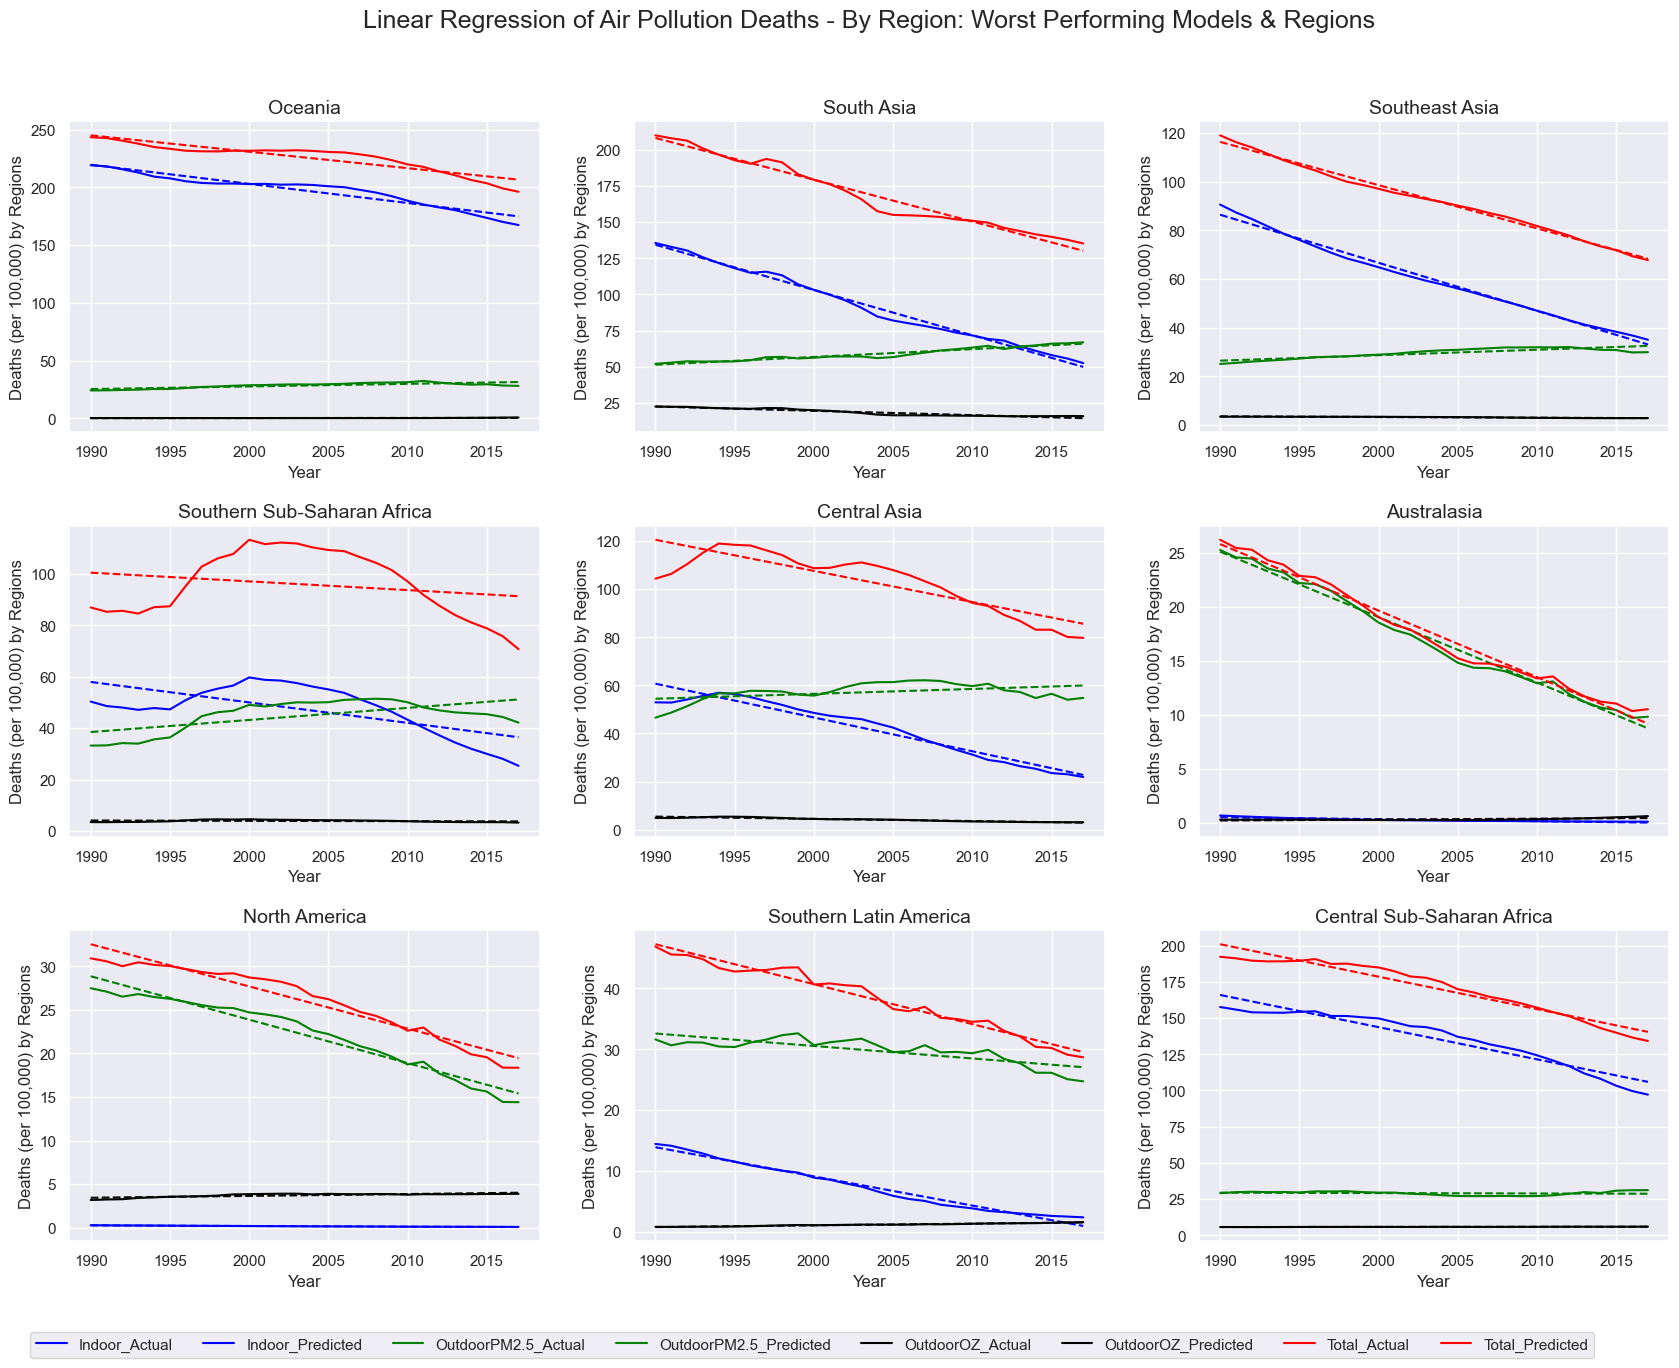

In [411]:
# Plot the worst performing regions (negative slope or no change)
entities = ['Oceania','South Asia','Southeast Asia','Southern Sub-Saharan Africa',
            'Central Asia','Australasia','North America','Southern Latin America','Central Sub-Saharan Africa']
fid="Air Pollution Mortality - BarPlot - Best & Worst Performance.png"
title_add="- By Region: Worst Performing Models & Regions"
legend_adjust=0
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,legend_adjust)

### 4.3 Linear Regression per SDI by Air Pollution Type  <a class="anchor" id="4.4_SDI_LR"></a>

We will now look at developing individual linear regression models for each SDI category

In [412]:
# Run and store for the current group
# REGIONAL
grouplabel='SDIs' #tag for this analysis for data to be stored in the dictionaries
LR_parameters[grouplabel], LR_predictions[grouplabel] = \
                                    LR_multiple(grouplabel,df_SDIs,SDIs,indicators,LR_titles,Pred_titles)

In [413]:
#pd.set_option('display.max_rows', 10)
LR_parameters[grouplabel]

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                             
High SDI                -0.089            178.904           0.89   
High-middle SDI         -1.410           2846.108           0.97   
Middle SDI              -2.394           4841.346           0.98   
Low-middle SDI          -2.753           5600.687           1.00   
Low SDI                 -2.918           5968.206           1.00   

                 OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                          
High SDI                      -0.609                 1243.216   
High-middle SDI               -0.547                 1149.919   
Middle SDI                     0.068                  -90.126   
Low-middle SDI                 0.275                 -504.262   
Low SDI                        0.257                 -465.843   

                 OutdoorPM2.5_Scores  OutdoorOZ_Slopes  OutdoorOZ_Intercepts  \
Entity                                                                         
High SDI                        1.00            -0.025                53.736   
High-middle SDI                 0.75            -0.413               836.301   
Middle SDI                      0.12            -0.399               810.601   
Low-middle SDI                  0.94            -0.202               416.859   
Low SDI                         0.54            -0.215               447.029   

                 OutdoorOZ_Scores  
Entity                             
High SDI                     0.97  
High-middle SDI              0.97  
Middle SDI                   0.98  
Low-middle SDI               0.94  
Low SDI                      0.87

In [414]:
# Average r2 regression Score for the Series
print('Mean of Indoor Air Pollution r2 Regression Scores is',round(LR_parameters[grouplabel]['Indoor_Scores'].mean(),3))
print('Mean of Outdoor Particulate Matter r2 Regression Scores is',round(LR_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(),3))
print('Mean of Outdoor OZone r2 Regression Scores is',round(LR_parameters[grouplabel]['OutdoorOZ_Scores'].mean(),3))

Mean of Indoor Air Pollution r2 Regression Scores is 0.968
Mean of Outdoor Particulate Matter r2 Regression Scores is 0.67
Mean of Outdoor OZone r2 Regression Scores is 0.946


In [415]:
# Determine which regions increasing pollution deaths per 100,000 with a positive slope
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Slopes']>0) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Slopes']>0) |
             (LR_parameters[grouplabel]['OutdoorOZ_Slopes']>0)]

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                            
Middle SDI             -2.394           4841.346           0.98   
Low-middle SDI         -2.753           5600.687           1.00   
Low SDI                -2.918           5968.206           1.00   

                OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                         
Middle SDI                    0.068                  -90.126   
Low-middle SDI                0.275                 -504.262   
Low SDI                       0.257                 -465.843   

                OutdoorPM2.5_Scores  OutdoorOZ_Slopes  OutdoorOZ_Intercepts  \
Entity                                                                        
Middle SDI                     0.12            -0.399               810.601   
Low-middle SDI                 0.94            -0.202               416.859   
Low SDI                        0.54            -0.215               447.029   

                OutdoorOZ_Scores  
Entity                            
Middle SDI                  0.98  
Low-middle SDI              0.94  
Low SDI                     0.87

It appears that while indoor air pollution and outdoor OZone deaths are decreasing, Outdoor PM2.5 deaths appear to be increasing for the 3 lowest sustainable development indicator categories. The models for PM2.5 and OZone deaths are very strongly linear with regression score average >0.94, while the model predicting PM2.5 deaths has a poor performance of 0.67.

In [416]:
# Determine which regions have the poorest regression model performance
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorOZ_Scores']<0.2)]

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                        
Middle SDI         -2.394           4841.346           0.98   

            OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  OutdoorPM2.5_Scores  \
Entity                                                                          
Middle SDI                0.068                  -90.126                 0.12   

            OutdoorOZ_Slopes  OutdoorOZ_Intercepts  OutdoorOZ_Scores  
Entity                                                                
Middle SDI            -0.399               810.601              0.98

The middle SDI has a terrible Outdoor PM2.5 death regression score

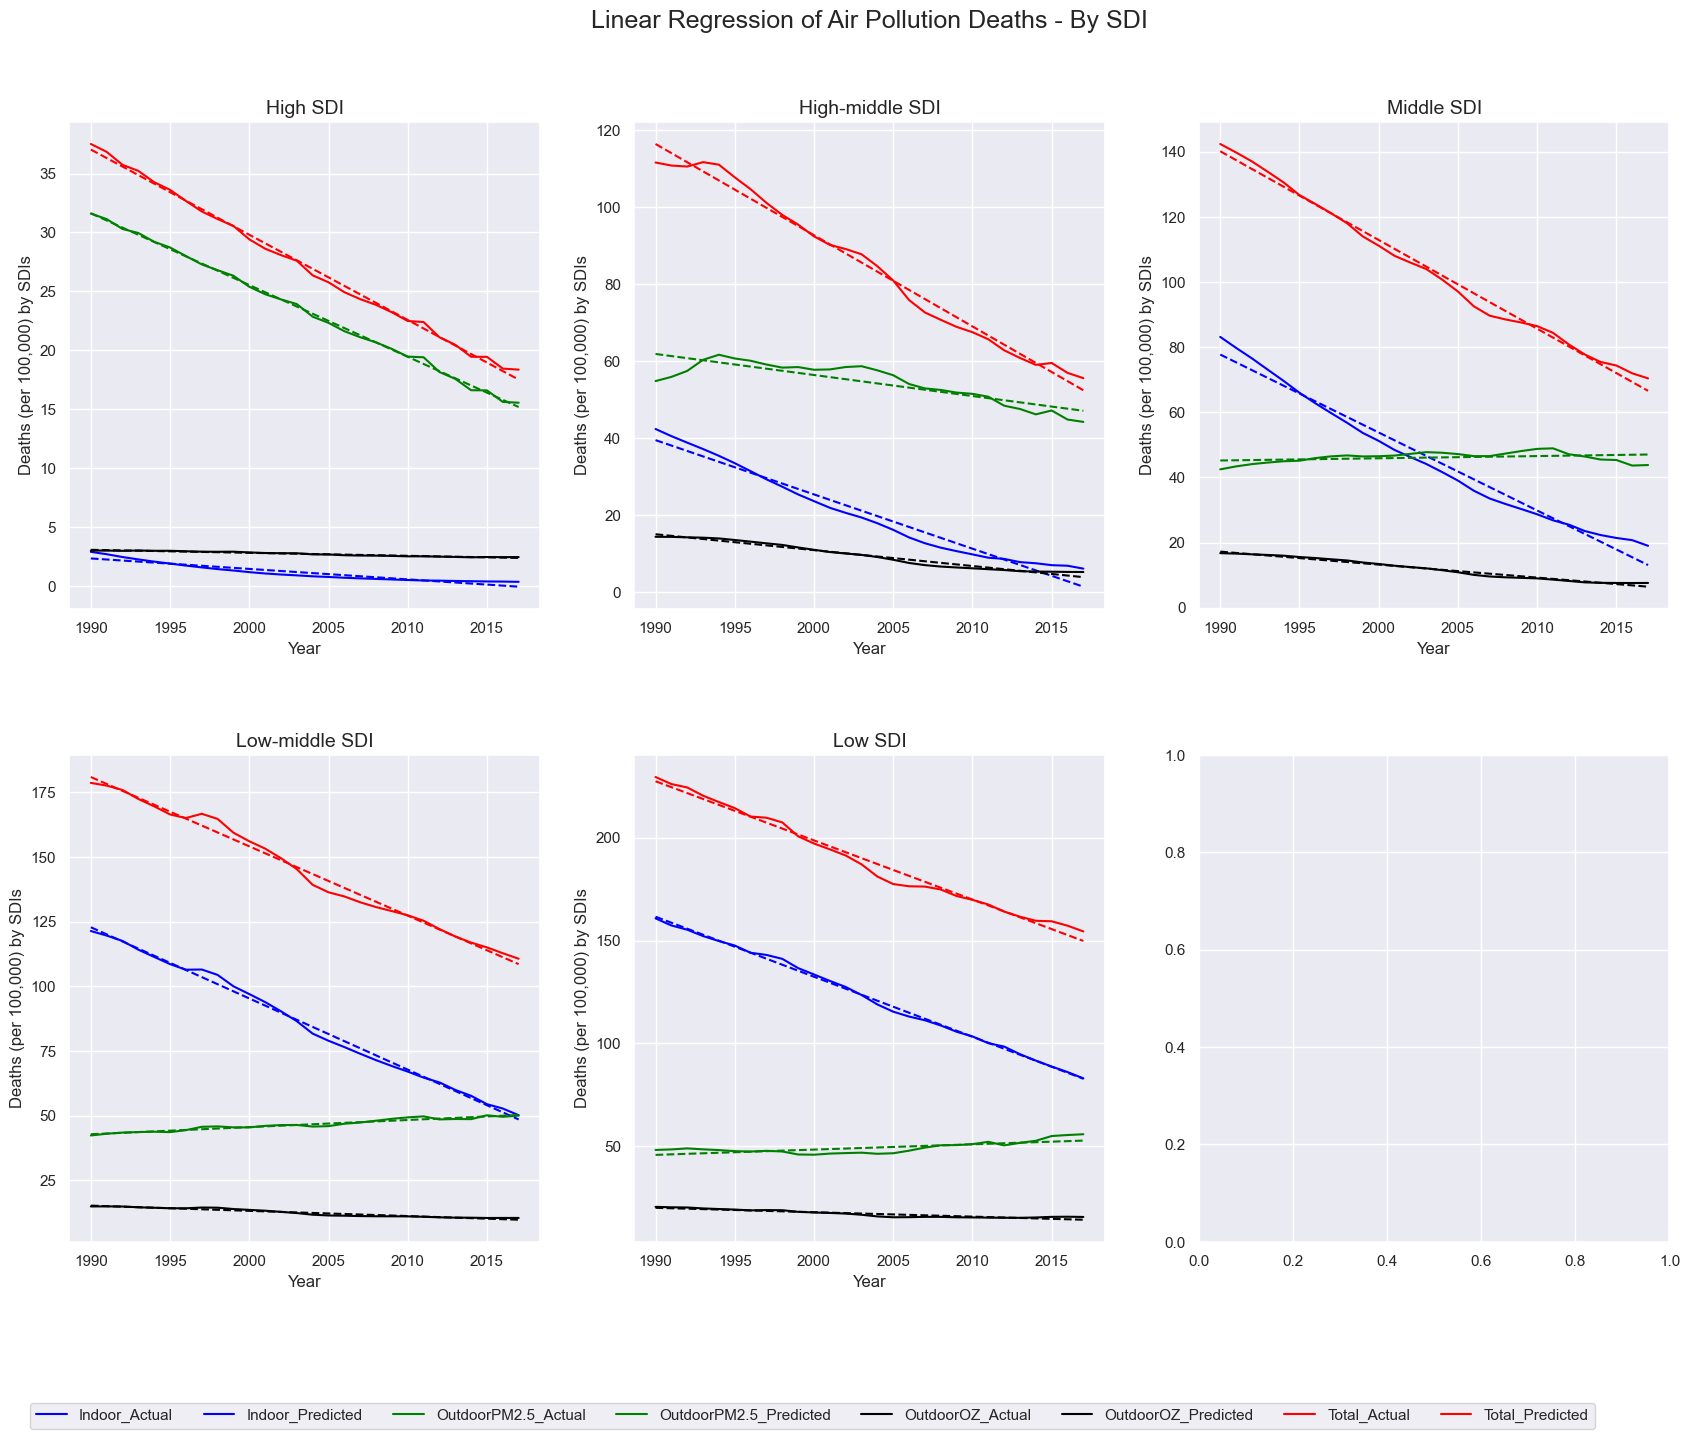

In [417]:
# Plot the worst performing regions (negative slope or no change)
entities = SDIs
fid="Air Pollution Mortality - BarPlot - SDI all.png"
title_add="- By SDI"
legend_adjust=+1.2
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,legend_adjust)

### 4.4 Linear Regression per COUNTRY by Air Pollution Type  <a class="anchor" id="4.4_Country_LR"></a>

Finally we will develop individual regression models for each country, which can be more useful in modelling air pollution deaths into future

In [418]:
# Run and store for the current group
# NATIONAL LEVEL
countries=list(df_countries['Entity'].unique())
grouplabel='Countries' #tag for this analysis for data to be stored in the dictionaries
LR_parameters[grouplabel], LR_predictions[grouplabel] = \
                                    LR_multiple(grouplabel,df_countries,countries,indicators,LR_titles,Pred_titles)

In [419]:
#pd.set_option('display.max_rows', 10)


Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                            
Afghanistan            -4.440           9098.942           0.89   
Albania                -1.612           3265.636           0.97   
Algeria                -0.128            257.786           0.96   
American Samoa         -0.973           1981.413           1.00   
Andorra                -0.028             57.120           0.84   
...                       ...                ...            ...   
Venezuela              -0.170            341.720           0.76   
Vietnam                -2.052           4163.289           1.00   
Yemen                  -4.455           9012.922           0.99   
Zambia                 -3.595           7318.560           0.95   
Zimbabwe                1.506          -2909.707           0.39   

                OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                         
Afghanistan                   0.058                  -71.215   
Albania                      -0.050                  122.059   
Algeria                      -0.747                 1546.638   
American Samoa                0.462                 -888.584   
Andorra                      -0.452                  924.650   
...                             ...                      ...   
Venezuela                    -0.373                  785.660   
Vietnam                       0.504                 -980.472   
Yemen                         0.823                -1604.312   
Zambia                       -0.295                  615.693   
Zimbabwe                      0.395                 -764.483   

                OutdoorPM2.5_Scores  OutdoorOZ_Slopes  OutdoorOZ_Intercepts  \
Entity                                                                        
Afghanistan                    0.23             0.006                -5.824   
Albania                        0.21            -0.097               196.360   
Algeria                        0.99            -0.012                26.345   
American Samoa                 0.61            -0.001                 1.102   
Andorra                        0.93            -0.023                48.135   
...                             ...               ...                   ...   
Venezuela                      0.86             0.014               -27.265   
Vietnam                        0.93            -0.010                23.626   
Yemen                          0.93            -0.002                 7.662   
Zambia                         0.82            -0.097               200.221   
Zimbabwe                       0.36             0.030               -55.936   

                OutdoorOZ_Scores  
Entity                            
Afghanistan                 0.23  
Albania                     0.92  
Algeria                     0.92  
American Samoa              0.96  
Andorra                     0.81  
...                          ...  
Venezuela                   0.78  
Vietnam                     0.47  
Yemen                       0.07  
Zambia                      0.93  
Zimbabwe                    0.18  

[195 rows x 9 columns]

In [420]:
# Average R2 regression Score for the Series
print('Indoor Mean (std) R2: %.3f (%.3f)' % (LR_parameters[grouplabel]['Indoor_Scores'].mean(), LR_parameters[grouplabel]['Indoor_Scores'].std()) )
print('Outdoor PM2.5 Mean (std) R2: %.3f (%.3f)' % (LR_parameters[grouplabel]['OutdoorPM2.5_Scores'].mean(), LR_parameters[grouplabel]['OutdoorPM2.5_Scores'].std()) )
print('Outdoor OZone Mean (std) R2: %.3f (%.3f)' % (LR_parameters[grouplabel]['OutdoorOZ_Scores'].mean(), LR_parameters[grouplabel]['OutdoorOZ_Scores'].std()) )

Indoor Mean (std) R2: 0.889 (0.151)
Outdoor PM2.5 Mean (std) R2: 0.612 (0.344)
Outdoor OZone Mean (std) R2: 0.665 (0.306)


We can see that the average model score for predicting indoor air pollution deaths is 0.89, which is quite high. On average the model score for both Outdoor PM2.5 and Outdoor OZone is low at 0.62-0.67 with relatively large standard deviations in R2 score across the national model. 

#### 4.4.1 Countries with Increasing Indoor Pollution Deaths Trend or Bad Performance

In [427]:
# Determine which countries have increasing pollution deaths per 100,000 with a positive slope
# OR performing models
# Indoor pollution
plotgroup = LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Slopes']>0) | 
                          (LR_parameters[grouplabel]['Indoor_Scores']<0.55) ]
plotgroup

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                         
Ethiopia            -1.997           4115.262           0.48   
Ghana               -0.982           2064.545           0.54   
Lesotho              0.535           -957.656           0.17   
North Korea         -0.536           1177.074           0.24   
Philippines          0.095           -116.615           0.02   
Russia              -0.003              5.605           0.11   
South Korea         -0.038             75.659           0.51   
Swaziland           -1.843           3803.942           0.51   
Zimbabwe             1.506          -2909.707           0.39   

             OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                      
Ethiopia                  -0.962                 1949.519   
Ghana                      0.348                 -668.600   
Lesotho                    0.929                -1820.240   
North Korea               -0.100                  241.605   
Philippines                0.250                 -464.870   
Russia                    -1.081                 2229.577   
South Korea               -1.080                 2198.057   
Swaziland                  0.930                -1830.325   
Zimbabwe                   0.395                 -764.483   

             OutdoorPM2.5_Scores  OutdoorOZ_Slopes  OutdoorOZ_Intercepts  \
Entity                                                                     
Ethiopia                    0.70            -0.039                79.584   
Ghana                       0.66             0.010               -17.983   
Lesotho                     0.92             0.041               -74.235   
North Korea                 0.15            -0.306               645.755   
Philippines                 0.66             0.028               -55.758   
Russia                      0.54            -0.051               104.388   
South Korea                 0.99            -0.055               113.070   
Swaziland                   0.91            -0.039                84.490   
Zimbabwe                    0.36             0.030               -55.936   

             OutdoorOZ_Scores  
Entity                         
Ethiopia                 0.97  
Ghana                    0.83  
Lesotho                  0.42  
North Korea              0.63  
Philippines              0.94  
Russia                   0.83  
South Korea              0.61  
Swaziland                0.25  
Zimbabwe                 0.18

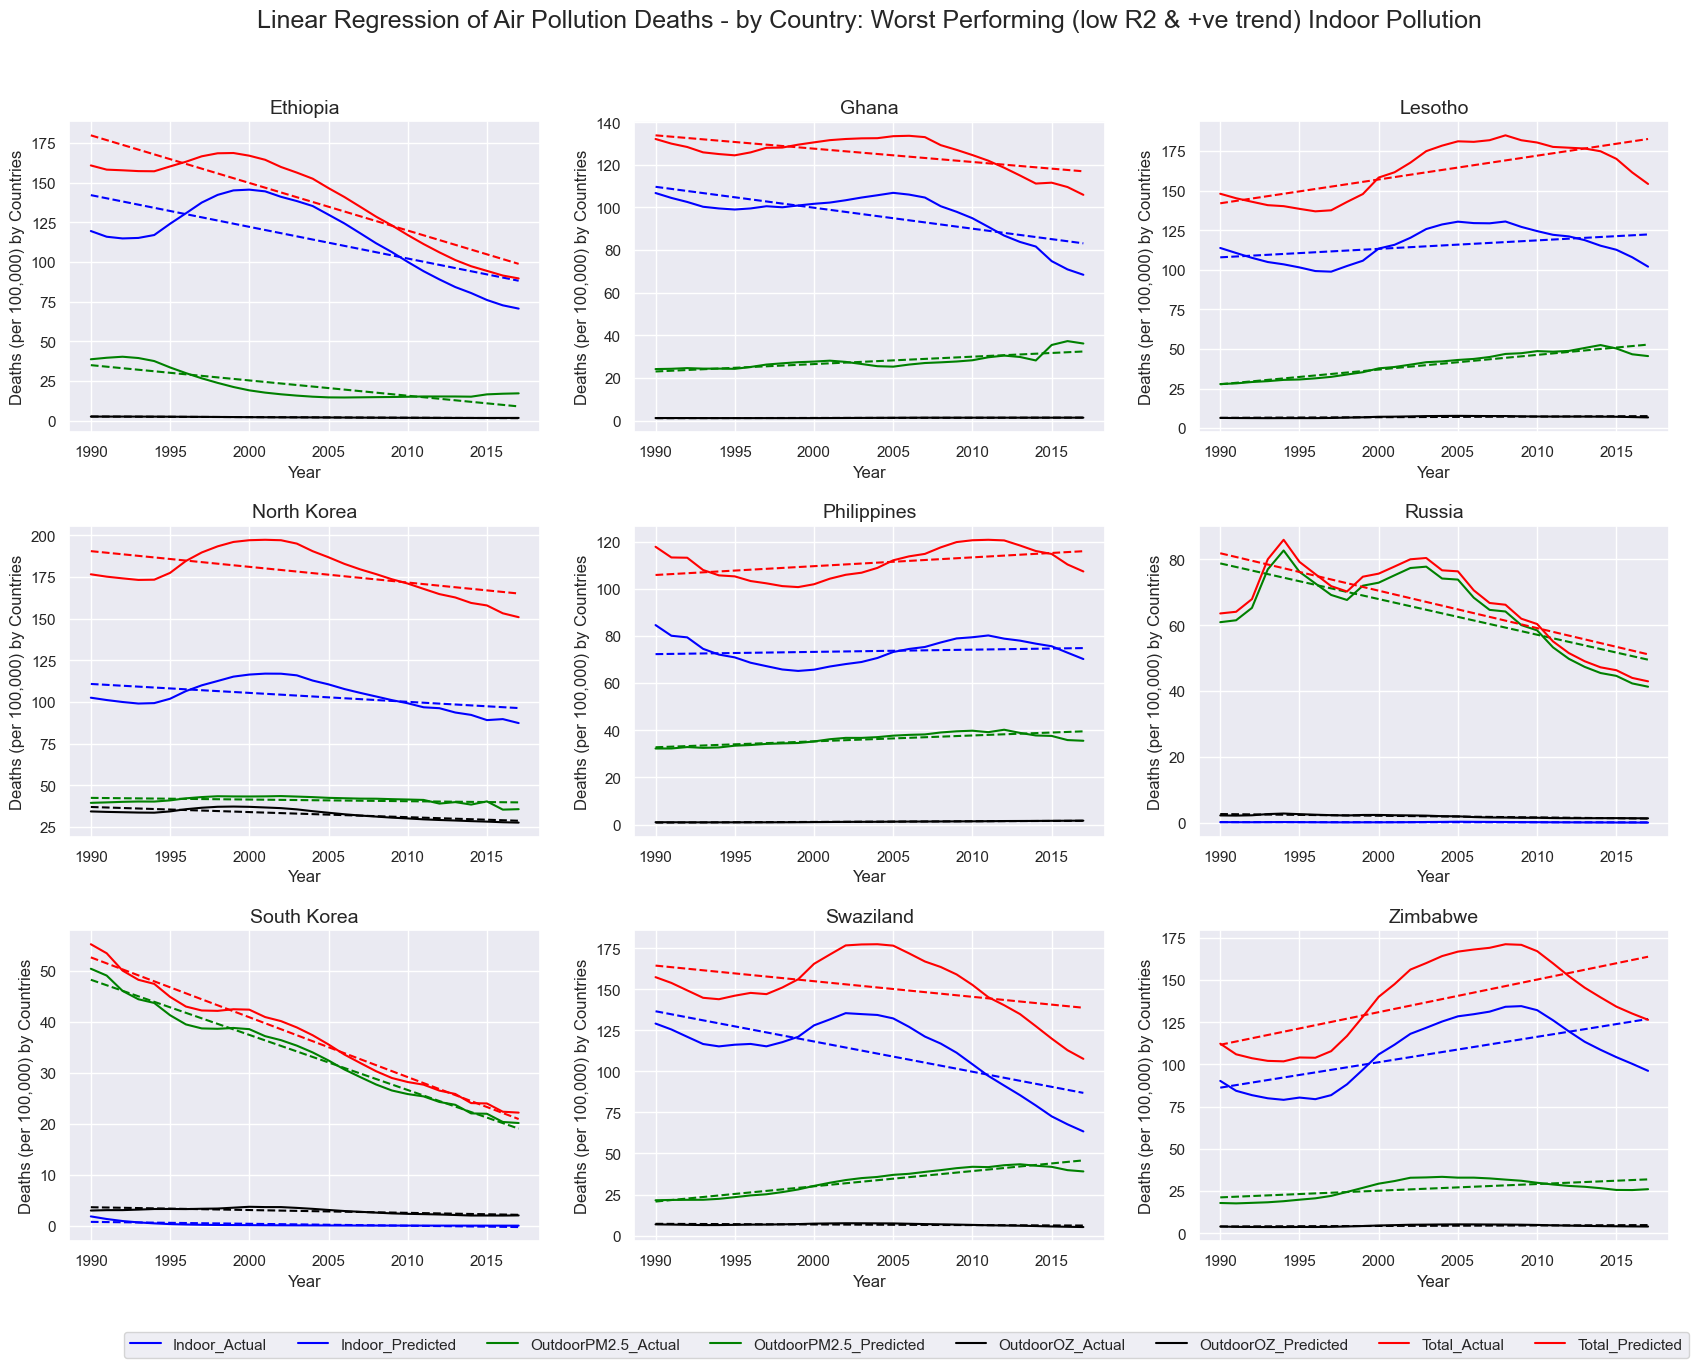

In [428]:
# Plot the group
entities = list(plotgroup.index)
fid="LR_WorstCountries_Indoor.png"
title_add="- by Country: Worst Performing (low R2 & +ve trend) Indoor Pollution"
legend_adjust=+0.2
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,legend_adjust)

We can see that the both indoor and PM2.5 LR models are non-linear for these countries. Polynomial regressions could be examined instead for the low-performing sets. Notice that the Philippines Zimbabwe and Lesotho have positive slopes, representing an upward trend in indoor pollution deaths per 100,000

#### 4.4.2 Countries with Increasing Outdoor PM2.5 Pollution Deaths Trend or Bad Performance

In [434]:
# Determine which countries have increasing pollution deaths per 100,000 with a positive slope & worst model fit
# Outdoor PM2.5 Pollution
plotgroup = LR_parameters[grouplabel][(LR_parameters[grouplabel]['OutdoorPM2.5_Slopes']>0) &
                                     (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']<0.3)] \
#sort the worst performers
plotgroup=plotgroup.sort_values(['OutdoorPM2.5_Slopes','OutdoorPM2.5_Scores'],ascending=[False, True])
plotgroup

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                           
South Africa          -1.026           2088.787           0.59   
Myanmar               -4.556           9256.133           0.99   
Libya                 -0.034             68.265           0.94   
Belize                -1.242           2513.423           0.97   
Azerbaijan            -1.665           3377.552           0.91   
...                      ...                ...            ...   
Tajikistan            -1.947           3962.739           0.94   
Burkina Faso          -1.773           3690.386           0.97   
Ecuador               -0.673           1358.873           0.87   
Guinea-Bissau         -2.932           6057.121           0.98   
Mauritius             -0.925           1865.546           0.87   

               OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                        
South Africa                 0.419                 -791.426   
Myanmar                      0.156                 -271.296   
Libya                        0.142                 -218.584   
Belize                       0.141                 -249.274   
Azerbaijan                   0.123                 -185.501   
...                            ...                      ...   
Tajikistan                   0.043                  -34.633   
Burkina Faso                 0.042                  -65.956   
Ecuador                      0.040                  -52.318   
Guinea-Bissau                0.036                  -50.465   
Mauritius                    0.032                  -16.060   

               OutdoorPM2.5_Scores  OutdoorOZ_Slopes  OutdoorOZ_Intercepts  \
Entity                                                                       
South Africa                  0.29            -0.010                24.477   
Myanmar                       0.22            -0.131               276.246   
Libya                         0.24             0.026               -50.083   
Belize                        0.07             0.007               -13.327   
Azerbaijan                    0.07            -0.065               134.355   
...                            ...               ...                   ...   
Tajikistan                    0.01            -0.104               211.458   
Burkina Faso                  0.08            -0.001                 3.064   
Ecuador                       0.02            -0.009                18.679   
Guinea-Bissau                 0.09            -0.015                32.523   
Mauritius                     0.01            -0.025                51.493   

               OutdoorOZ_Scores  
Entity                           
South Africa               0.04  
Myanmar                    0.77  
Libya                      0.70  
Belize                     0.13  
Azerbaijan                 0.60  
...                         ...  
Tajikistan                 0.91  
Burkina Faso               0.01  
Ecuador                    0.87  
Guinea-Bissau              0.26  
Mauritius                  0.92  

[14 rows x 9 columns]

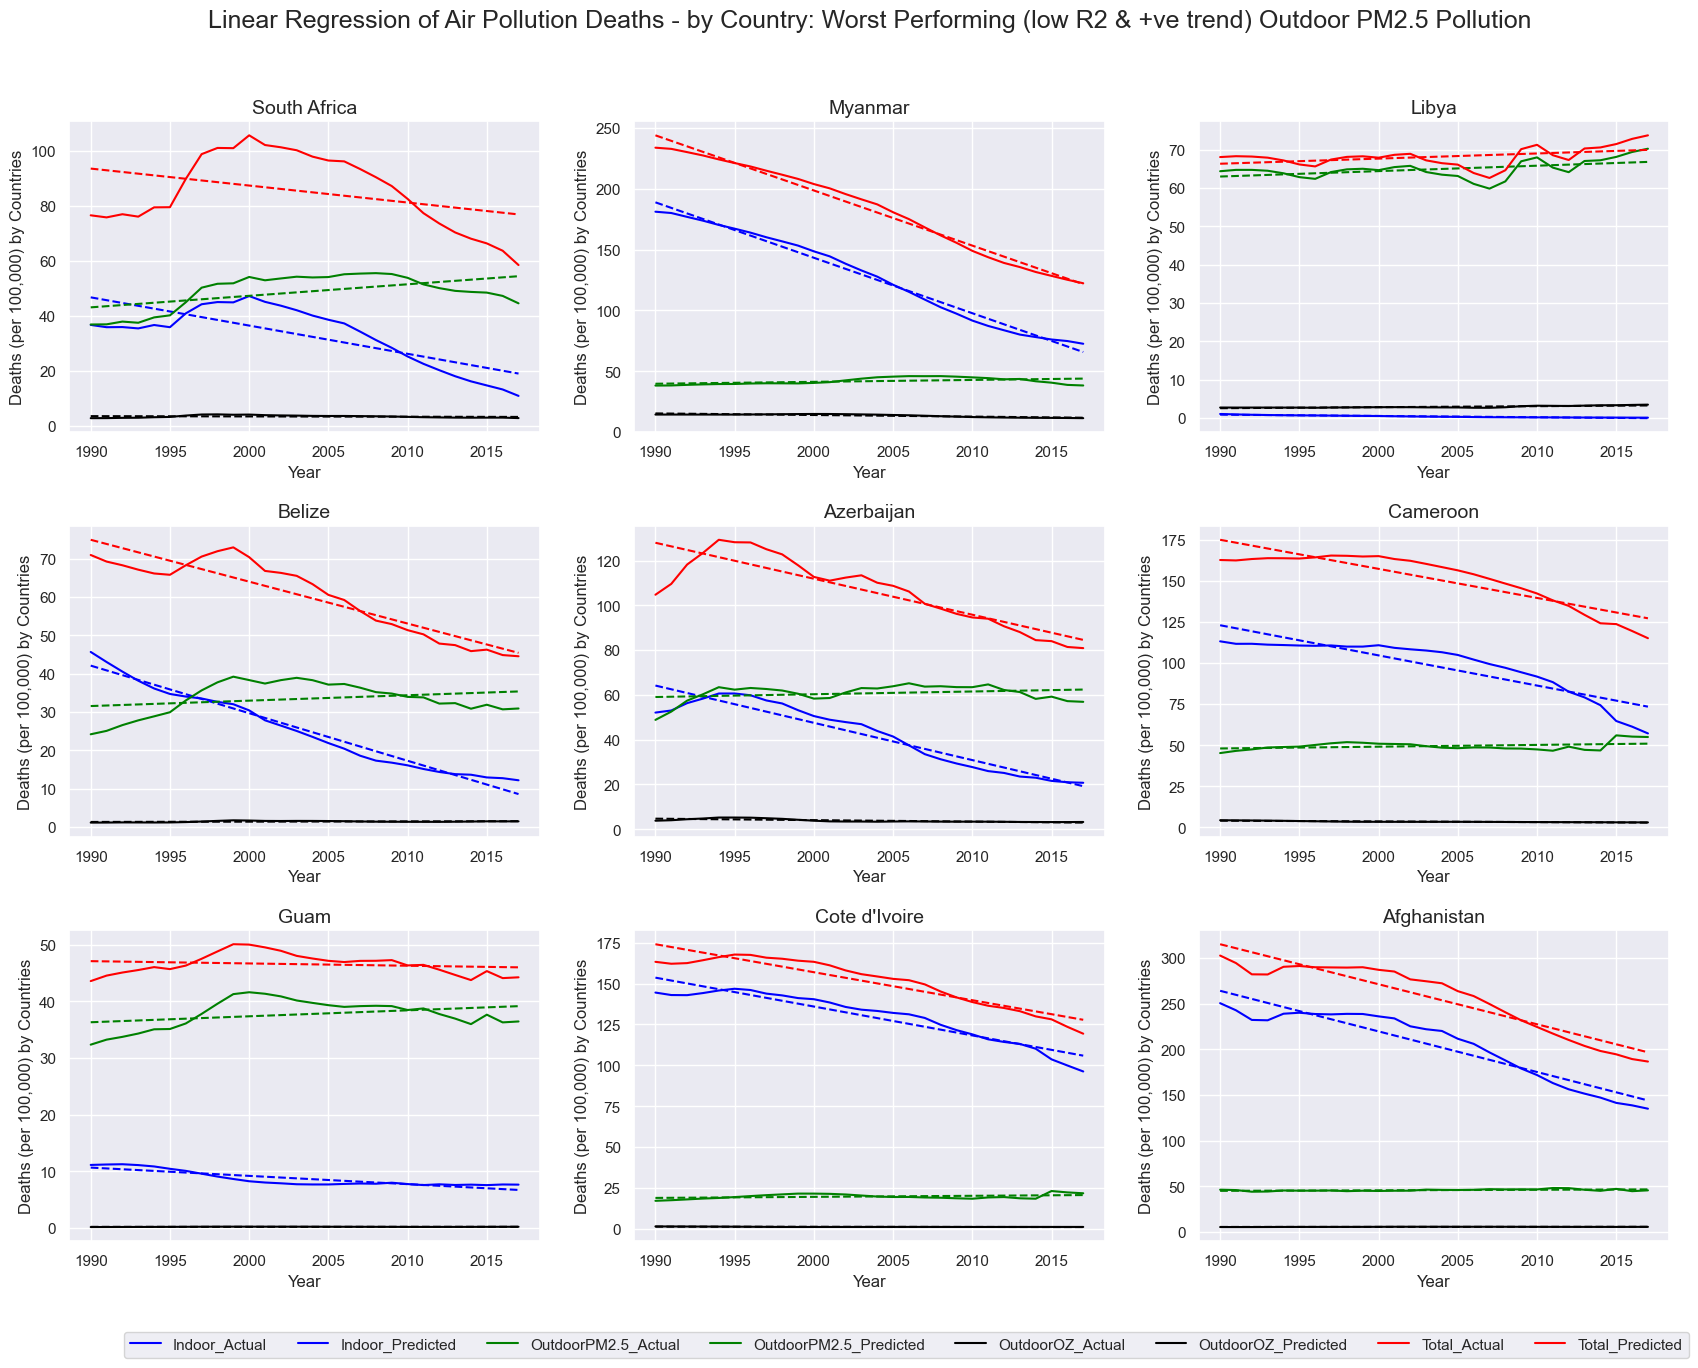

In [436]:
# Plot the group
entities = list(plotgroup.iloc[0:9,:].index)
fid="LR_WorstCountries_OutdoorPM2.5.png"
title_add="- by Country: Worst Performing (low R2 & +ve trend) Outdoor PM2.5 Pollution"
legend_adjust=+0.2
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,legend_adjust)

#### 4.4.3 Countries with Increasing Outdoor OZone Pollution Deaths Trend or Bad Performance

In [439]:
# Determine which countries have increasing pollution deaths per 100,000 with a positive slope
# Outdoor Ozone Pollution
plotgroup=LR_parameters[grouplabel][(LR_parameters[grouplabel]['OutdoorOZ_Slopes']>0) & 
                          (LR_parameters[grouplabel]['OutdoorOZ_Scores']<0.3)]
#sort the worst performers
plotgroup=plotgroup.sort_values(['OutdoorOZ_Slopes','OutdoorOZ_Scores'],ascending=[False, True])
plotgroup

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                                
Zimbabwe                    1.506          -2909.707           0.39   
Guinea                     -1.642           3457.714           0.97   
Sierra Leone               -2.139           4456.816           0.89   
Czech Republic             -0.119            240.302           0.85   
Belize                     -1.242           2513.423           0.97   
...                           ...                ...            ...   
Mali                       -2.400           4924.438           0.97   
Gambia                     -1.285           2701.381           0.94   
Dominican Republic         -0.786           1592.950           0.90   
Cuba                       -0.305            616.667           0.94   
Grenada                    -1.500           3021.145           0.80   

                    OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                             
Zimbabwe                          0.395                 -764.483   
Guinea                            0.190                 -366.973   
Sierra Leone                      0.100                 -186.346   
Czech Republic                   -1.328                 2703.399   
Belize                            0.141                 -249.274   
...                                 ...                      ...   
Mali                             -0.066                  145.962   
Gambia                            0.187                 -352.046   
Dominican Republic                0.557                -1097.809   
Cuba                             -0.563                 1163.984   
Grenada                           0.223                 -401.736   

                    OutdoorPM2.5_Scores  OutdoorOZ_Slopes  \
Entity                                                      
Zimbabwe                           0.36             0.030   
Guinea                             0.73             0.013   
Sierra Leone                       0.55             0.011   
Czech Republic                     0.95             0.008   
Belize                             0.07             0.007   
...                                 ...               ...   
Mali                               0.34             0.004   
Gambia                             0.72             0.003   
Dominican Republic                 0.98             0.003   
Cuba                               0.94             0.001   
Grenada                            0.62             0.001   

                    OutdoorOZ_Intercepts  OutdoorOZ_Scores  
Entity                                                      
Zimbabwe                         -55.936              0.18  
Guinea                           -24.103              0.18  
Sierra Leone                     -19.599              0.26  
Czech Republic                   -13.604              0.05  
Belize                           -13.327              0.13  
...                                  ...               ...  
Mali                              -4.835              0.07  
Gambia                            -4.209              0.02  
Dominican Republic                -5.742              0.15  
Cuba                              -0.492              0.01  
Grenada                           -0.865              0.05  

[11 rows x 9 columns]

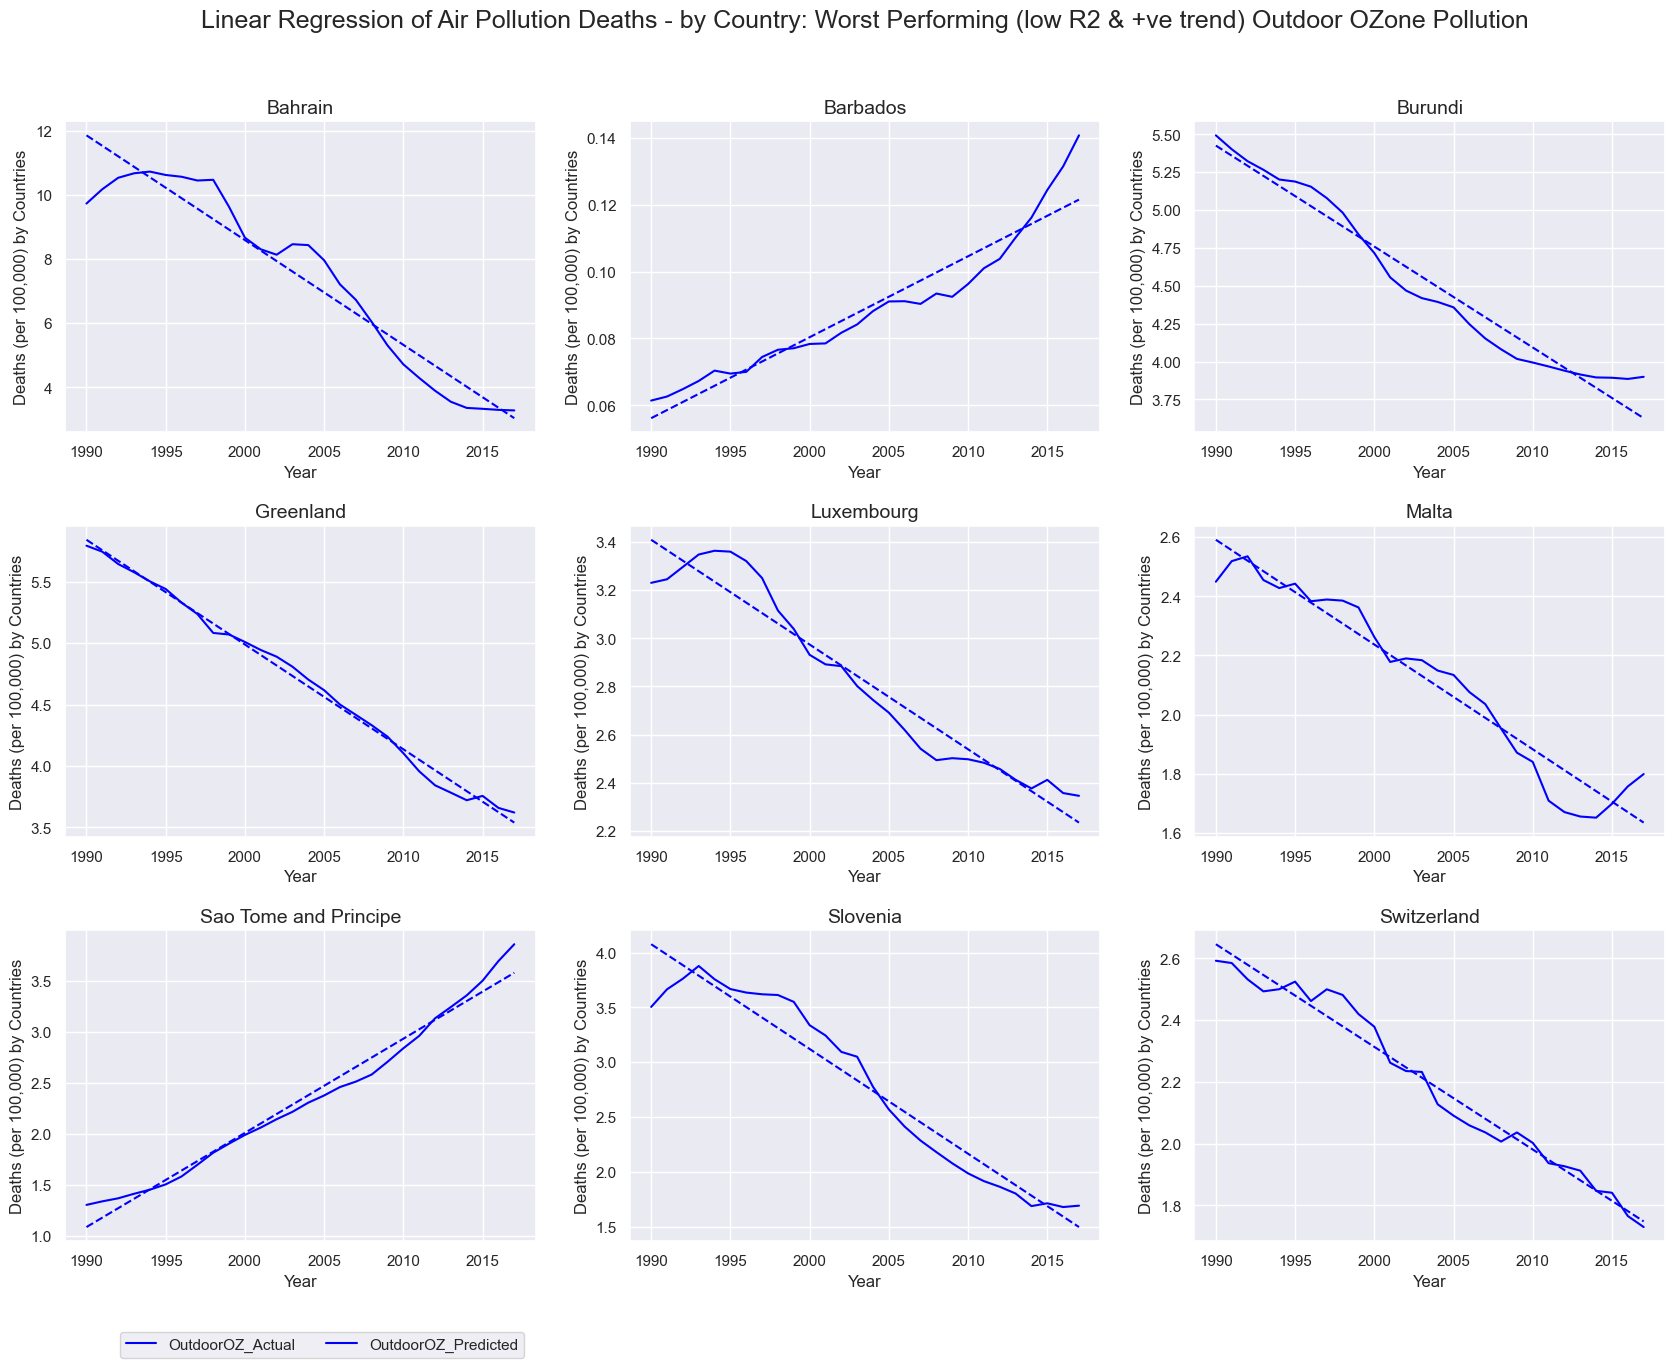

In [455]:
# Plot the group
entities = list(plotgroup.iloc[1:10,:].index)
fid="LR_WorstCountries_OZone.png"
title_add="- by Country: Worst Performing (low R2 & +ve trend) Outdoor OZone Pollution"
legend_adjust=+0.2
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles[4:8],root_plots+fid,title_add,legend_adjust)

OZone deaths are highly non-linear but the magnitude of the deaths in comparison the the total deaths is about 1-2% on average

#### 4.4.4 Countries with Worst Overall Performance Across 3-Indicator Prediction

In [451]:
# Determine which regions have the poorest regression model performance among all indicators
LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']<0.2) |
             (LR_parameters[grouplabel]['OutdoorOZ_Scores']<0.2)]

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                        
Argentina          -0.469            947.113           0.98   
Armenia            -1.820           3679.228           0.98   
Azerbaijan         -1.665           3377.552           0.91   
Belize             -1.242           2513.423           0.97   
Benin              -2.152           4434.224           0.99   
...                   ...                ...            ...   
Tajikistan         -1.947           3962.739           0.94   
Tanzania           -2.420           4955.877           0.98   
Togo               -1.721           3569.412           0.94   
Yemen              -4.455           9012.922           0.99   
Zimbabwe            1.506          -2909.707           0.39   

            OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  OutdoorPM2.5_Scores  \
Entity                                                                          
Argentina                -0.069                  169.344                 0.10   
Armenia                  -0.031                  115.888                 0.01   
Azerbaijan                0.123                 -185.501                 0.07   
Belize                    0.141                 -249.274                 0.07   
Benin                    -0.010                   39.481                 0.00   
...                         ...                      ...                  ...   
Tajikistan                0.043                  -34.633                 0.01   
Tanzania                 -0.042                  100.612                 0.34   
Togo                     -0.016                   53.911                 0.01   
Yemen                     0.823                -1604.312                 0.93   
Zimbabwe                  0.395                 -764.483                 0.36   

            OutdoorOZ_Slopes  OutdoorOZ_Intercepts  OutdoorOZ_Scores  
Entity                                                                
Argentina              0.031               -61.565              0.97  
Armenia               -0.101               208.058              0.90  
Azerbaijan            -0.065               134.355              0.60  
Belize                 0.007               -13.327              0.13  
Benin                 -0.017                35.989              0.35  
...                      ...                   ...               ...  
Tajikistan            -0.104               211.458              0.91  
Tanzania              -0.001                 3.390              0.02  
Togo                  -0.008                17.616              0.17  
Yemen                 -0.002                 7.662              0.07  
Zimbabwe               0.030               -55.936              0.18  

[61 rows x 9 columns]

#### 4.4.5 Countries with Good Model Performance Across 3-Indicator Prediction

In [452]:
# Determine which regions have the BEST regression model performance among all indicators
plotgroup=LR_parameters[grouplabel][(LR_parameters[grouplabel]['Indoor_Scores']>0.9) &
             (LR_parameters[grouplabel]['OutdoorPM2.5_Scores']>0.9) &
             (LR_parameters[grouplabel]['OutdoorOZ_Scores']>0.9)]
plotgroup

Indoor_Slopes  Indoor_Intercepts  Indoor_Scores  \
Entity                                                                   
Algeria                       -0.128            257.786           0.96   
Bahrain                       -0.086            173.136           0.96   
Barbados                      -0.011             21.906           0.92   
Burundi                       -3.788           7753.170           0.98   
Greenland                     -0.102            206.060           0.96   
Luxembourg                    -0.031             61.944           0.94   
Malta                         -0.066            132.369           0.92   
Sao Tome and Principe         -2.262           4640.903           0.91   
Slovenia                      -0.398            802.720           0.94   
Switzerland                   -0.031             62.646           0.99   

                       OutdoorPM2.5_Slopes  OutdoorPM2.5_Intercepts  \
Entity                                                                
Algeria                             -0.747                 1546.638   
Bahrain                             -3.245                 6599.619   
Barbados                            -0.675                 1396.952   
Burundi                             -0.445                  918.103   
Greenland                           -1.197                 2443.283   
Luxembourg                          -0.726                 1476.819   
Malta                               -0.745                 1522.524   
Sao Tome and Principe                0.519                -1014.687   
Slovenia                            -0.856                 1741.773   
Switzerland                         -0.642                 1303.645   

                       OutdoorPM2.5_Scores  OutdoorOZ_Slopes  \
Entity                                                         
Algeria                               0.99            -0.012   
Bahrain                               0.96            -0.326   
Barbados                              0.95             0.002   
Burundi                               0.93            -0.067   
Greenland                             1.00            -0.085   
Luxembourg                            1.00            -0.043   
Malta                                 0.99            -0.035   
Sao Tome and Principe                 0.96             0.092   
Slovenia                              0.96            -0.096   
Switzerland                           0.99            -0.033   

                       OutdoorOZ_Intercepts  OutdoorOZ_Scores  
Entity                                                         
Algeria                              26.345              0.92  
Bahrain                             661.489              0.92  
Barbados                             -4.763              0.91  
Burundi                             137.943              0.96  
Greenland                           175.620              0.99  
Luxembourg                           89.933              0.93  
Malta                                73.048              0.94  
Sao Tome and Principe              -182.769              0.98  
Slovenia                            194.215              0.94  
Switzerland                          68.813              0.97

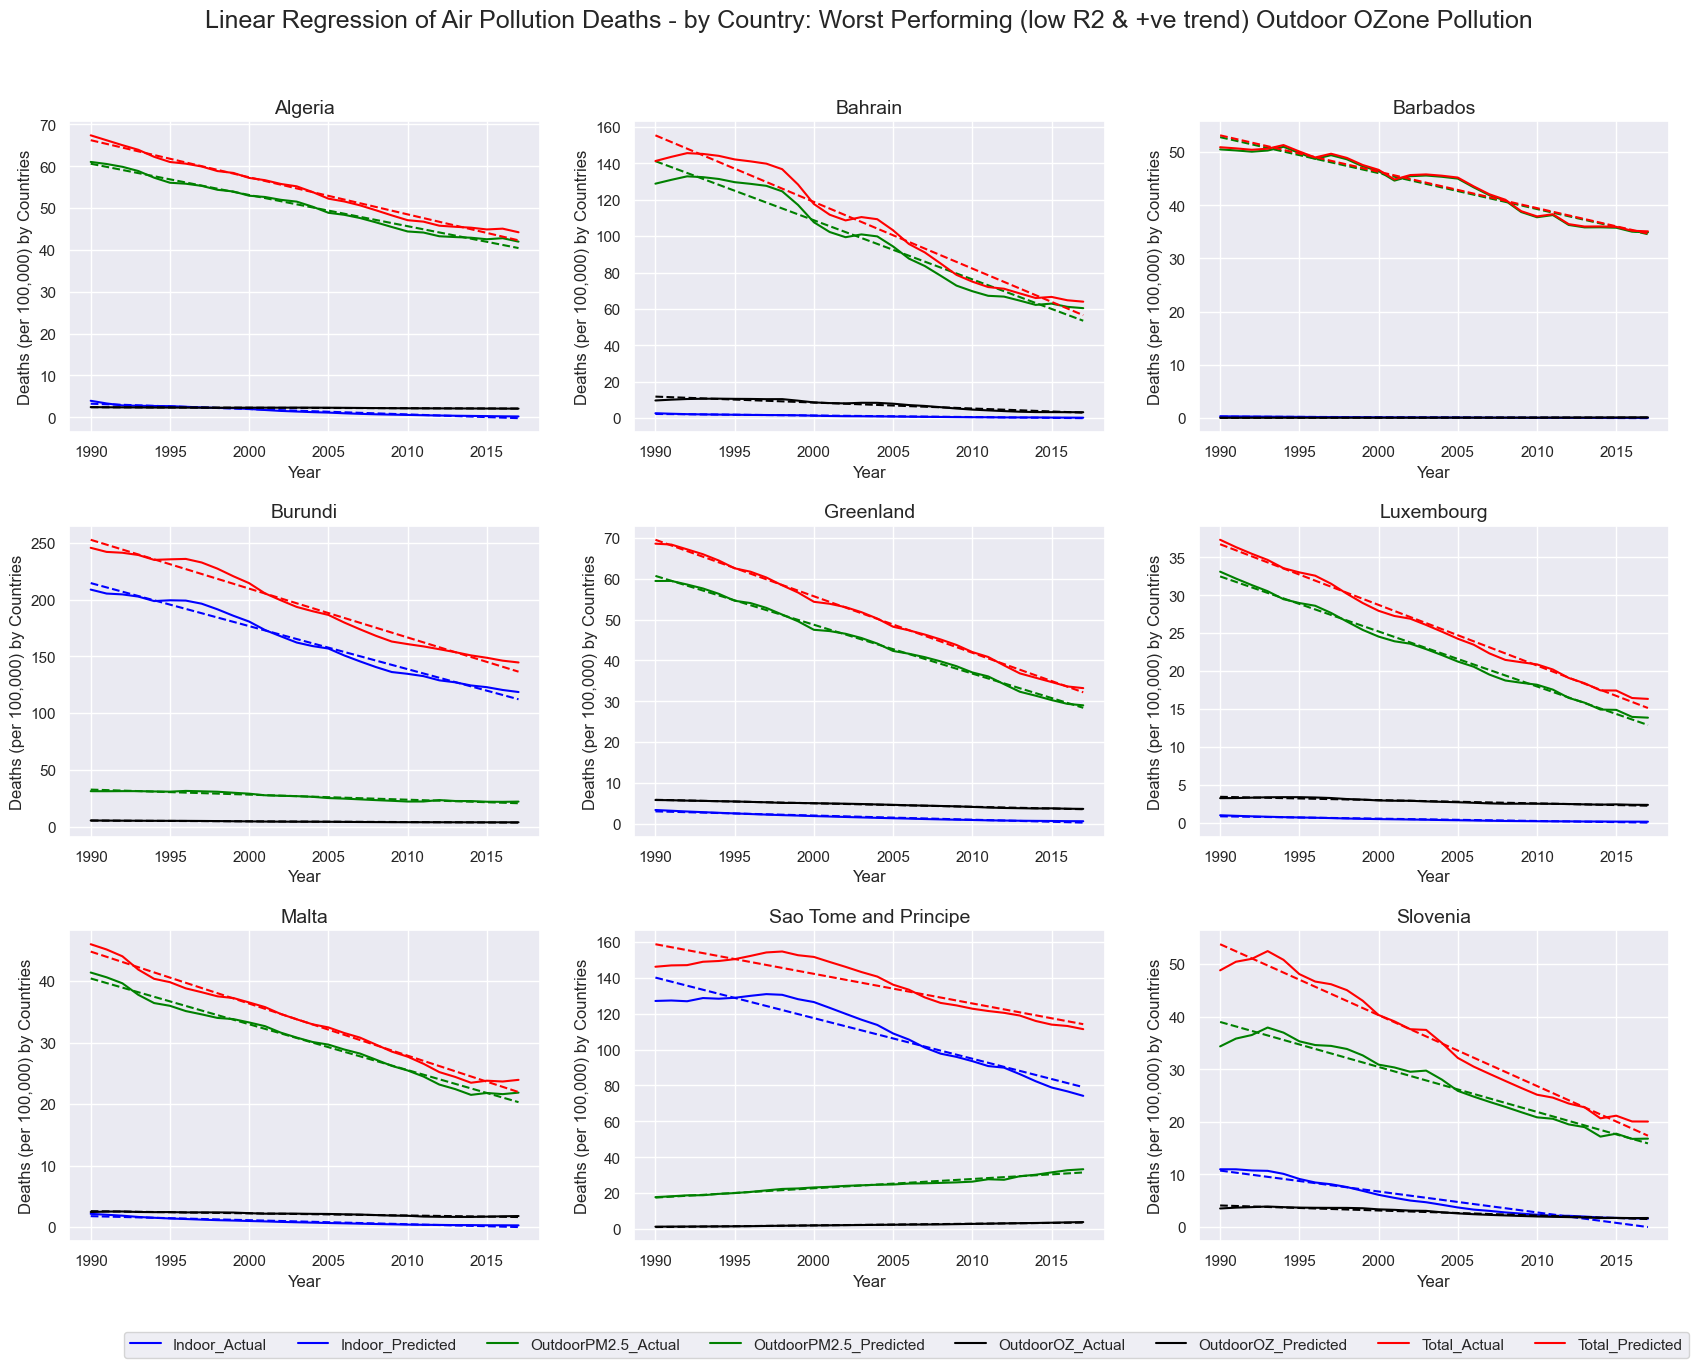

In [453]:
# Plot the group
entities = list(plotgroup.index)
fid="LR_WorstCountries_OZone.png"
title_add="- by Country: Worst Performing (low R2 & +ve trend) Outdoor OZone Pollution"
legend_adjust=+0.2
plot_LR_multiple(grouplabel,LR_predictions[grouplabel],entities,Pred_titles,root_plots+fid,title_add,legend_adjust)

### 4.5 Discussion

Ultimately the linear regression models are valuable at predicting the general trend in deaths due over time and be used to predict future deaths, where past data appears to be highly linear. It has severe limitations for many countries. Polynomial models could be explored. To explore the interaction with other features, we proceed to merge different datasets between death due to environmental factors and socio-demographic/economic factors. We then examine them in 3 tree-based machine learning models.